In [11]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

In [12]:
#Loading the Dataset
v_coupon = pd.read_csv(r"C:\Users\komma\Downloads\Documents\in-vehicle-coupon-recommendation.csv")

v_coupon

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [13]:
v_coupon = v_coupon.drop_duplicates()

In [14]:
print(f"Missing Values:\n{v_coupon.isnull().sum()}")

Missing Values:
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [15]:
numerical_cols = v_coupon.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Y')

In [16]:
v_coupon = v_coupon.copy()
v_coupon.drop(["car"], axis=1, inplace=True)




In [17]:
Y_counts = v_coupon.groupby('Y').Y.count()
print('Accepted coupon:',Y_counts[1],round(Y_counts[1]/v_coupon.shape[0]*100,3),'%')
print('Rejected coupon:',Y_counts[0],round(Y_counts[0]/v_coupon.shape[0]*100,3),'%')

Accepted coupon: 7157 56.757 %
Rejected coupon: 5453 43.243 %


In [18]:
# Import pandas
import pandas as pd

# Mode imputation for missing values in data
v_coupon['Bar'] = v_coupon['Bar'].fillna(v_coupon['Bar'].mode().iloc[0])
v_coupon['CoffeeHouse'] = v_coupon['CoffeeHouse'].fillna(v_coupon['CoffeeHouse'].mode().iloc[0])
v_coupon['CarryAway'] = v_coupon['CarryAway'].fillna(v_coupon['CarryAway'].mode().iloc[0])
v_coupon['RestaurantLessThan20'] = v_coupon['RestaurantLessThan20'].fillna(v_coupon['RestaurantLessThan20'].mode().iloc[0])
v_coupon['Restaurant20To50'] = v_coupon['Restaurant20To50'].fillna(v_coupon['Restaurant20To50'].mode().iloc[0])

# Printing the count of missing values in each column after imputation
print(f"After Imputation Missing Values:\n{v_coupon.isnull().sum()}")


After Imputation Missing Values:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [19]:
# Summary statistics for numeric variables
n_summary = v_coupon.describe()
print("Summary Statistics:\n", n_summary)



Summary Statistics:
         temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12610.000000  12610.000000           12610.0       12610.000000   
mean      63.267248      0.414512               1.0           0.559794   
std       19.153386      0.492657               0.0           0.496432   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12610.000000    12610.000000   12610.000000  12610.000000  
mean            0.116019        0.215543       0.784457      0.567565  
std             0.320260        0.411215       0.411215      0.495434  
min             0.000000

C:\Users\komma\AppData\Local\Temp\ipykernel_20216\939087846.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\komma\AppData\Local\Temp\ipykernel_20216\939087846.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\komma\AppData\Local\Temp\ipykernel_20216\939087846.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\komma\AppData\Local\Temp\ipykernel_20216\939087846.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\komma\AppData\Local\Temp\ipykernel_20216\939087846.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\komma\AppData\Local\Temp\ipykernel_20216\939087846.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\komma\AppData\Local\Temp\ipykernel_20216\939087846.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\komma\AppData\Loca

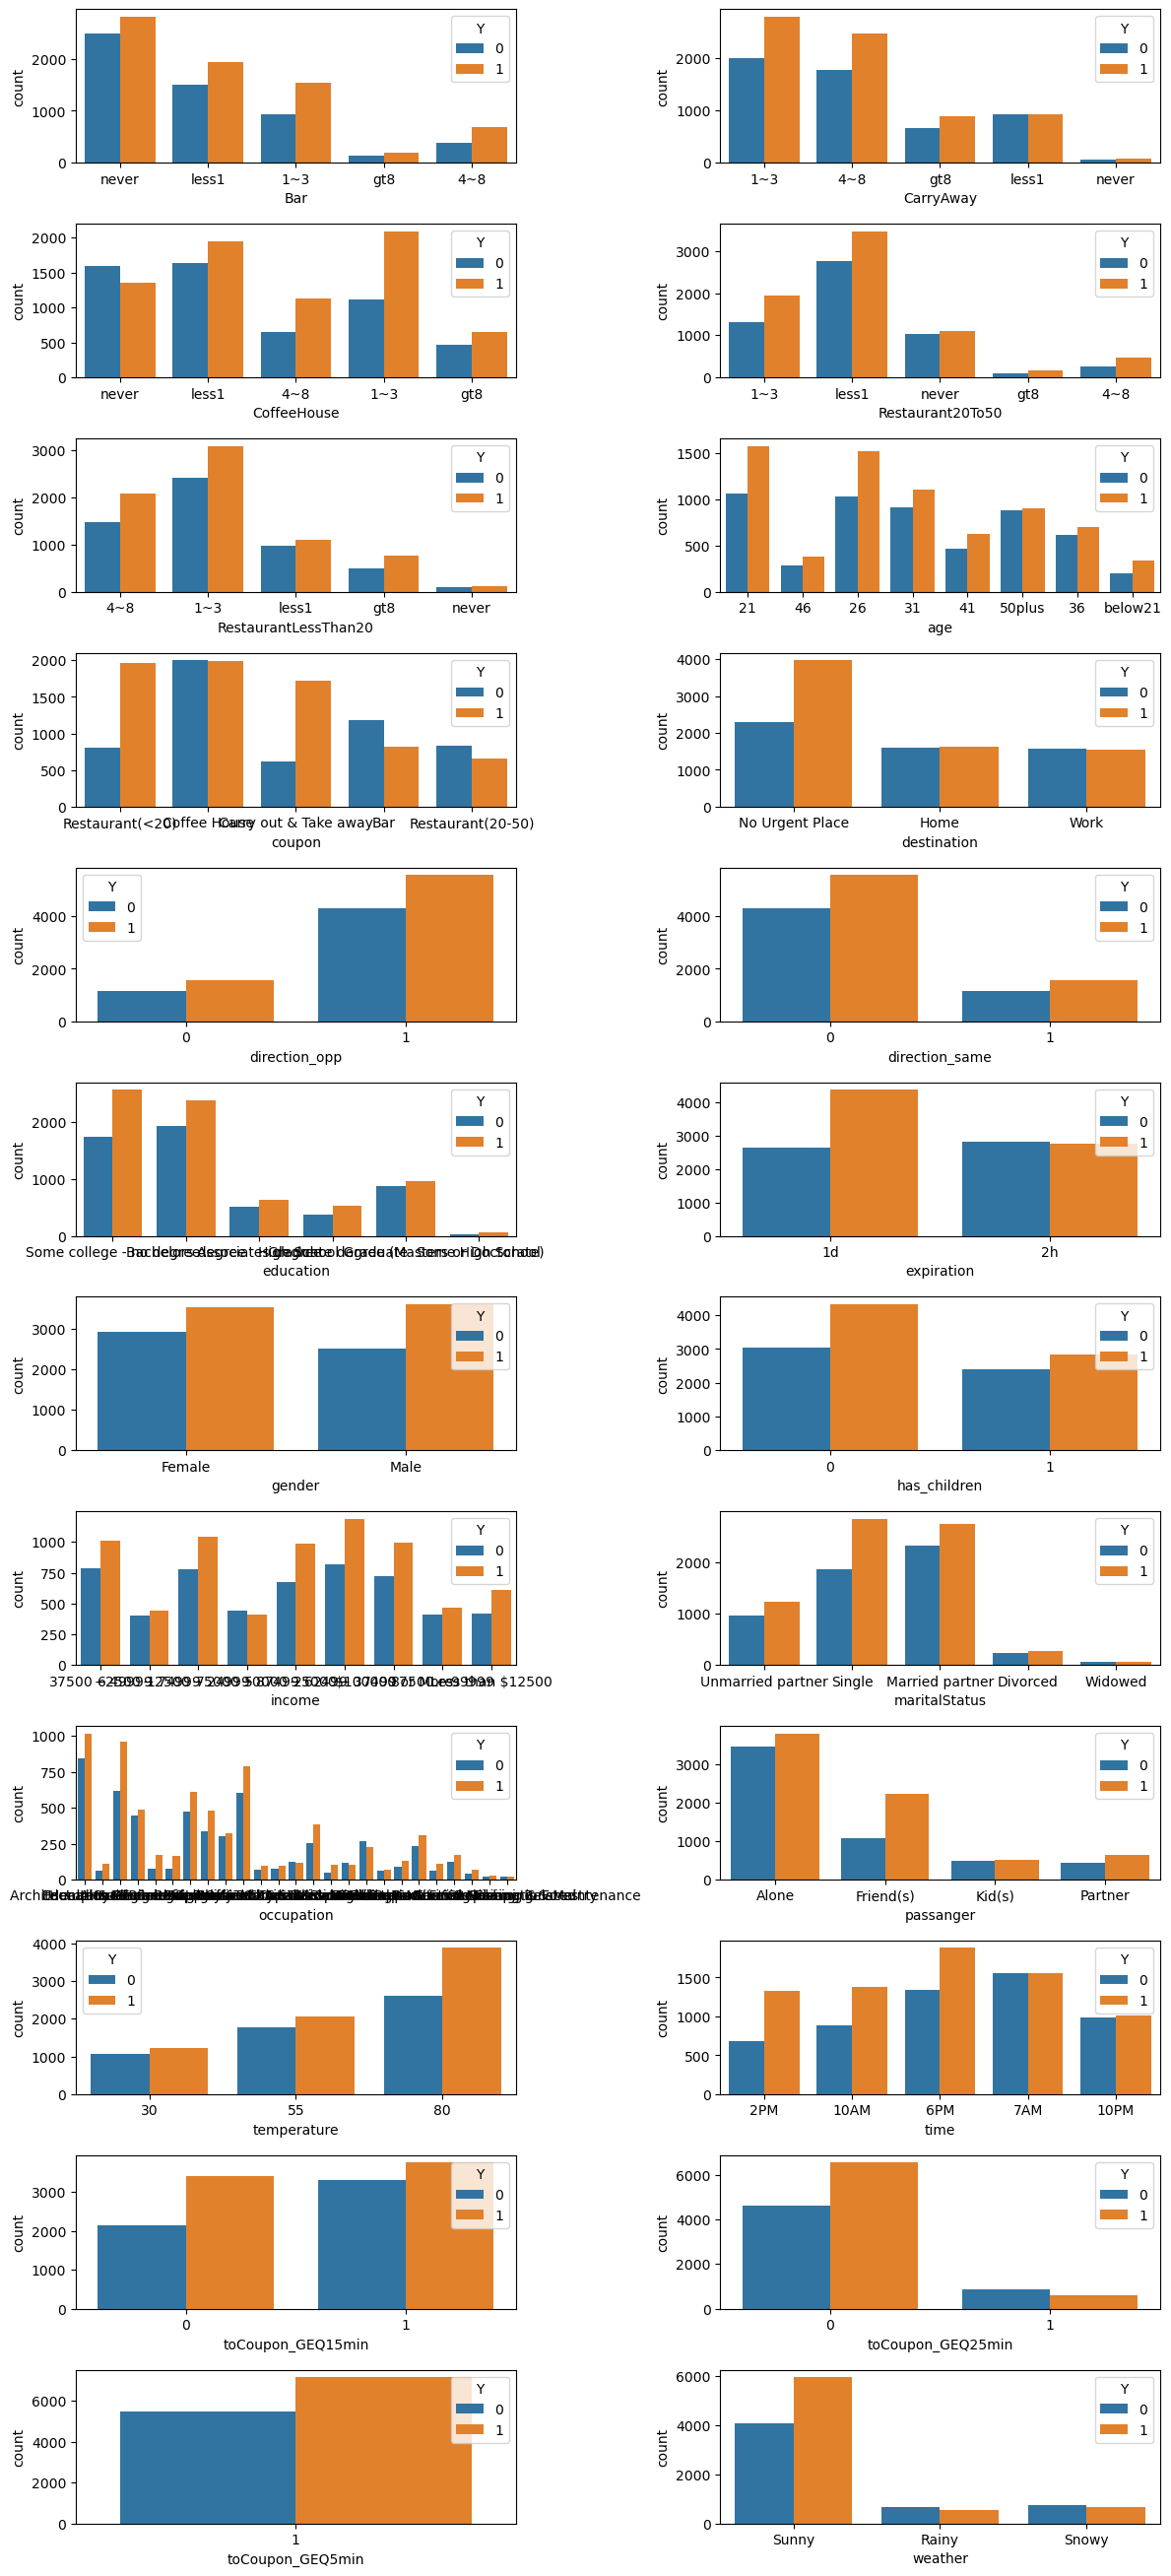

In [20]:
target = 'Y'
plt.figure(figsize = (12,28))
for a, col in enumerate(v_coupon.columns.difference([target])):
    plt.subplot(13, 2, a+1)
    plt.subplots_adjust(wspace = .5, hspace = 1)
    sns.countplot(x = col, data = v_coupon, hue = target)
    plt.tight_layout()

In [21]:
import matplotlib.pyplot as plt

def calculations(df, col):
    t_c = df[col].value_counts()
    t_p = t_c / len(df) * 100
    a_c = df[df.Y == 1].groupby(col).size()
    r_c = df[df.Y == 0].groupby(col).size()
    a_p = (a_c / t_c) * 100
    r_p = (r_c/ t_c) * 100

    r_df = pd.DataFrame({
        col: t_c.index,
        'Total': t_c.values,
        'Accepted': a_c.values,
        'Rejected': r_c.values,
        'Accepted %':a_p.values,
        'Rejected %':r_p.values,
    })
    return r_df

def uni_a(df, col):
    r_df = calculations(df, col)
    r_df = r_df.sort_values(by='Total', ascending=False)
    plt.figure(figsize=(6, 3))
    plt.barh(r_df[col], r_df['Total'], color='yellow', label='Total')
    plt.barh(r_df[col], r_df['Accepted'], color='green', label='Accepted')
    plt.legend()
    plt.xlabel('Counts')
    plt.title(f"{col} wise accepted coupons")
    plt.show()

    return r_df



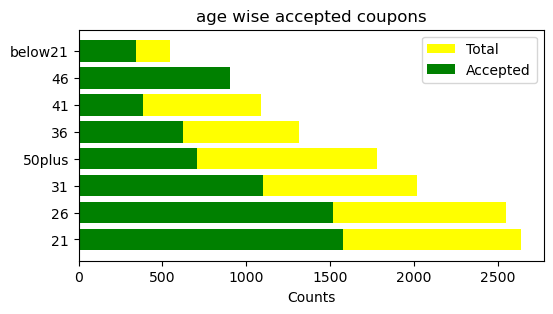

,age,Total,Accepted,Rejected,Accepted %,Rejected %
0,21,2642,1579,1063,59.765329,40.234671
1,26,2548,1517,1031,59.536892,40.463108
2,31,2019,1102,917,54.581476,45.418524
3,50plus,1781,705,612,53.530752,46.469248
4,36,1317,623,466,57.208448,42.791552
5,41,1089,384,286,57.313433,42.686567
6,46,670,903,878,50.701853,49.298147
7,below21,544,344,200,63.235294,36.764706


In [22]:
uni_a(v_coupon,'age')

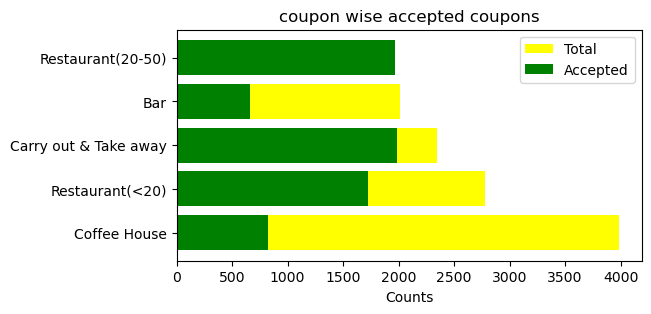

,coupon,Total,Accepted,Rejected,Accepted %,Rejected %
0,Coffee House,3989,824,1186,40.995025,59.004975
1,Restaurant(<20),2779,1720,624,73.378840,26.621160
2,Carry out & Take away,2344,1989,2000,49.862121,50.137879
3,Bar,2010,657,831,44.153226,55.846774
4,Restaurant(20-50),1488,1967,812,70.780856,29.219144


In [23]:
uni_a(v_coupon,'coupon')

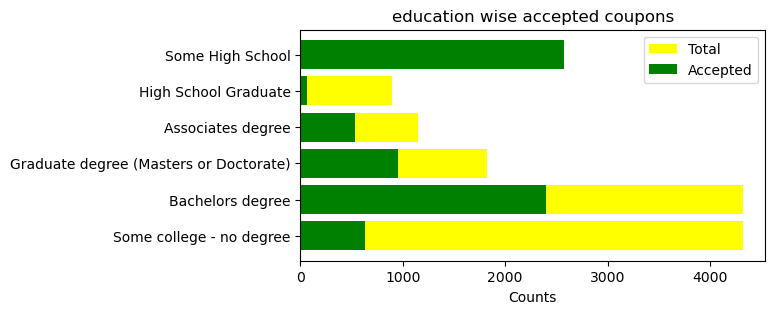

,education,Total,Accepted,Rejected,Accepted %,Rejected %
0,Some college - no degree,4325,634,514,55.226481,44.773519
1,Bachelors degree,4323,2395,1928,55.401342,44.598658
2,Graduate degree (Masters or Doctorate),1827,956,871,52.326218,47.673782
3,Associates degree,1148,532,367,59.176863,40.823137
4,High School Graduate,899,63,25,71.590909,28.409091
5,Some High School,88,2577,1748,59.583815,40.416185


In [24]:
uni_a(v_coupon,'education')

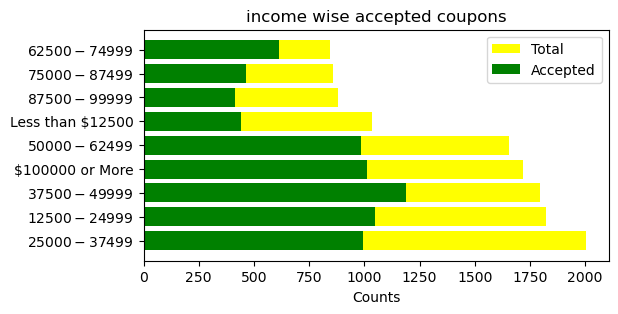

,income,Total,Accepted,Rejected,Accepted %,Rejected %
0,$25000 - $37499,2006,992,725,57.775189,42.224811
1,$12500 - $24999,1825,1047,778,57.369863,42.630137
2,$37500 - $49999,1795,1190,816,59.322034,40.677966
3,$100000 or More,1717,1010,785,56.267409,43.732591
4,$50000 - $62499,1655,984,671,59.456193,40.543807
5,Less than $12500,1034,443,400,52.550415,47.449585
6,$87500 - $99999,879,414,442,48.364486,51.635514
7,$75000 - $87499,856,465,414,52.901024,47.098976
8,$62500 - $74999,843,612,422,59.187621,40.812379


In [25]:
uni_a(v_coupon,'income')

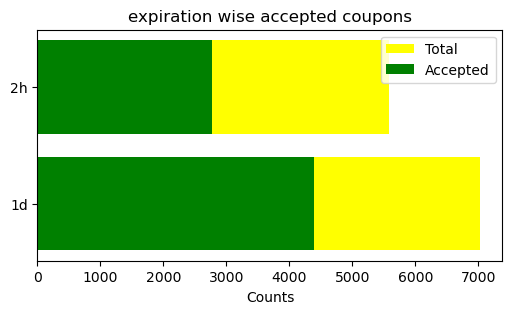

,expiration,Total,Accepted,Rejected,Accepted %,Rejected %
0,1d,7031,4390,2641,62.437776,37.562224
1,2h,5579,2767,2812,49.596702,50.403298


In [26]:
uni_a(v_coupon,'expiration')

In [27]:
def ca(df):
    # Select only numeric columns
    n_column = df.select_dtypes(include='number')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(n_column.corr(), annot=True, fmt=".2f", linewidths=.8)
    plt.title('Correlation Matrix')
    plt.show()


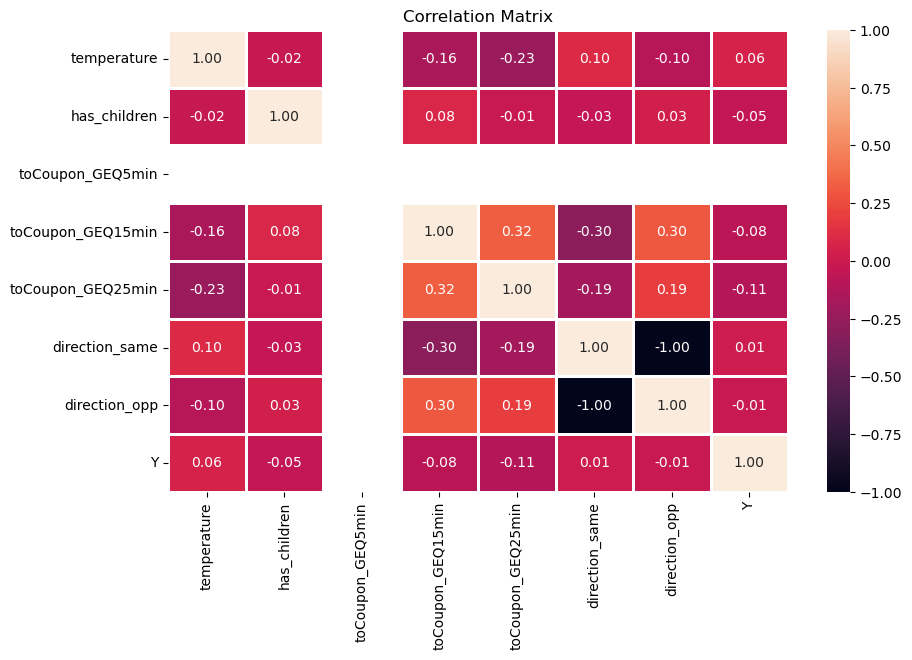

In [28]:
ca(v_coupon)

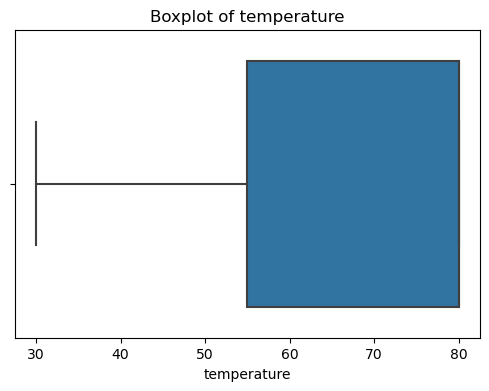

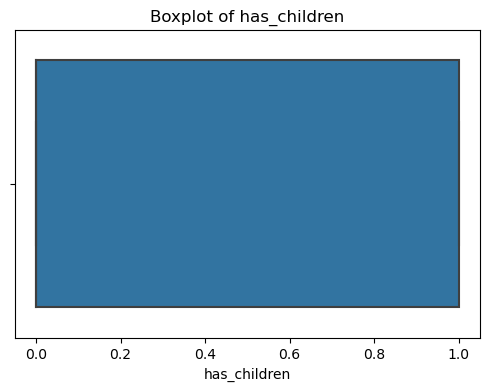

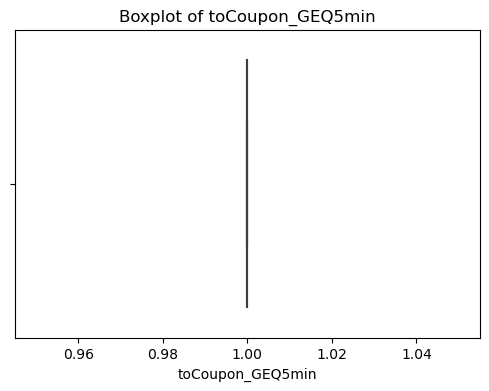

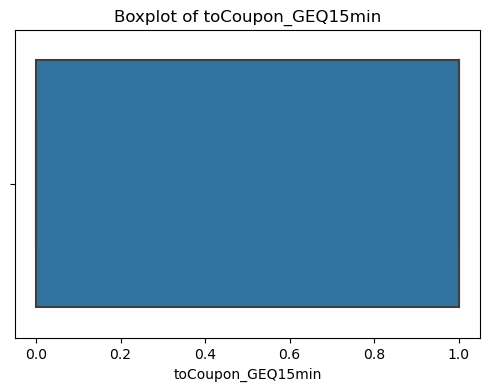

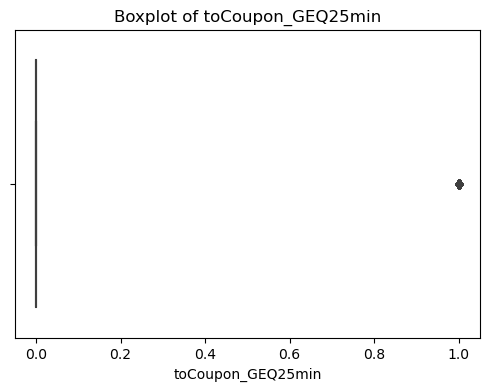

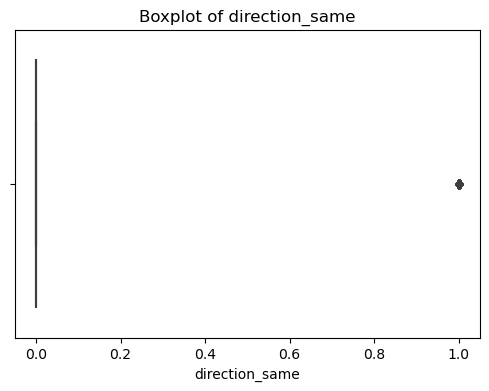

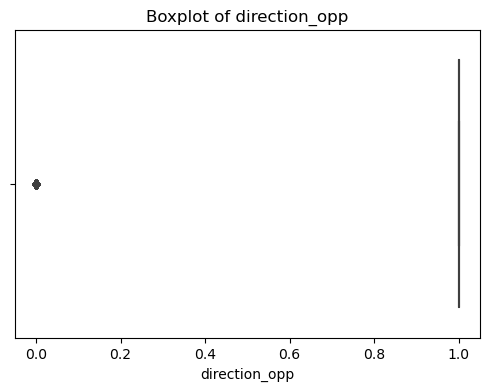

In [29]:
numerical_cols = v_coupon.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Y')
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=v_coupon[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [30]:
v_coupon.drop(["toCoupon_GEQ5min"], axis=1, inplace=True)

In [32]:
print(v_coupon['expiration'].unique())


['1d' '2h']


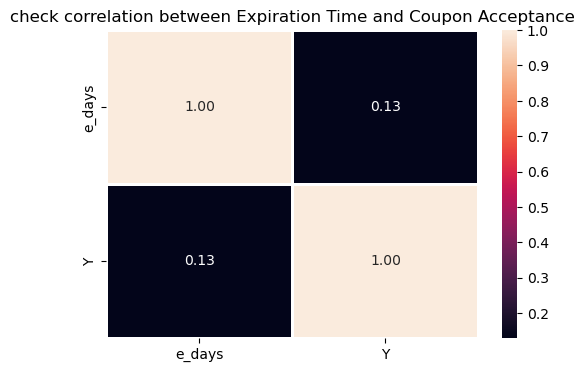

In [33]:
def con(d):
    v, u = int(d[:-1]), d[-1]
    if u == 'd':
        return v
    elif u == 'h':
        return v / 24  

def ca(df):
    df['e_days'] = df['expiration'].apply(con)
    n_column = df[['e_days', 'Y']]
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(n_column.corr(), annot=True, fmt=".2f", linewidths=.8)
    plt.title('check correlation between Expiration Time and Coupon Acceptance')
    plt.show()

ca(v_coupon)


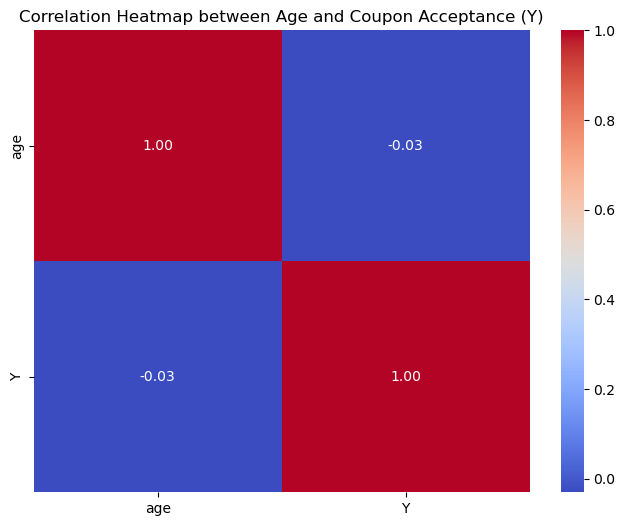

In [34]:
import seaborn as sns

# Convert 'age' column to numeric if necessary
v_coupon['age'] = pd.to_numeric(v_coupon['age'], errors='coerce')

# Calculate correlation matrix
correlation_matrix = v_coupon[['age', 'Y']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Age and Coupon Acceptance (Y)')
plt.show()


# BIVARIATE ANALYSIS

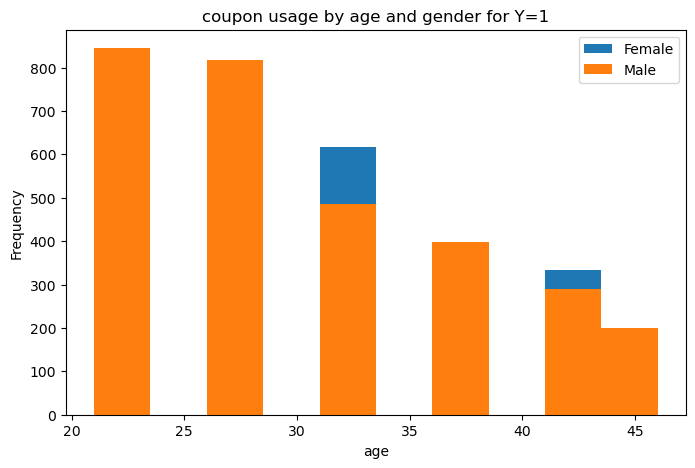

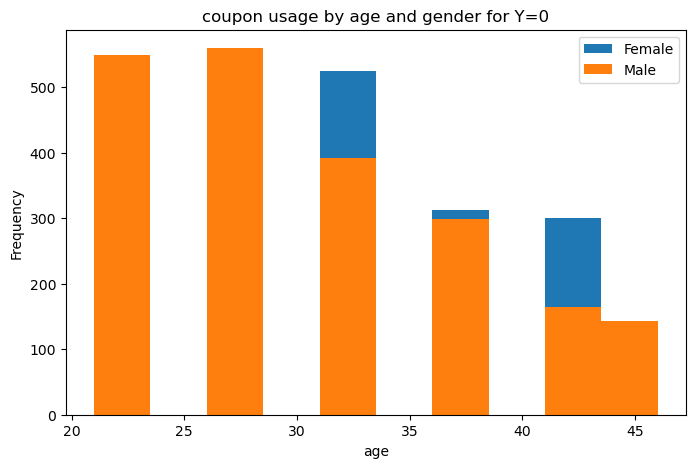

In [36]:
def histo(df, c1, c2, target_value):
    plt.figure(figsize=(8, 5))
    for gender in df[c2].unique():
        da = df[(df[c2] == gender) & (df['Y'] == target_value)]
        plt.hist(da[c1], label=gender)
    plt.xlabel(c1)
    plt.ylabel('Frequency')
    plt.title(f'coupon usage by {c1} and {c2} for Y={target_value}')
    plt.legend()
    plt.show()

# Plot histogram for coupon usage by age group for accepted coupons (Y=1)
histo(v_coupon, 'age', 'gender', 1)

# Plot histogram for coupon usage by age group for rejected coupons (Y=0)
histo(v_coupon, 'age', 'gender', 0)


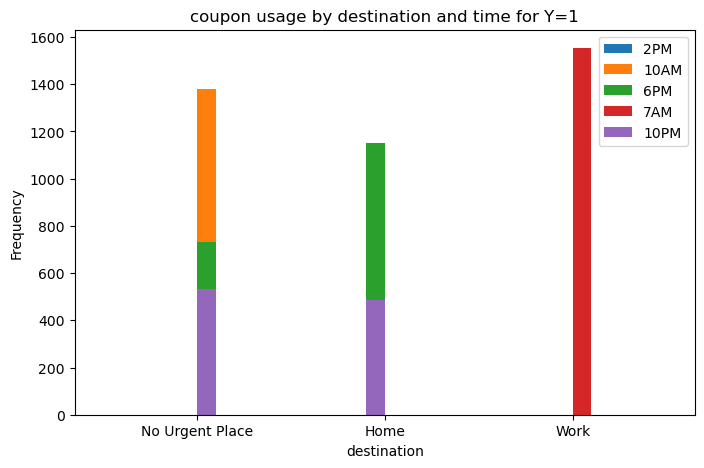

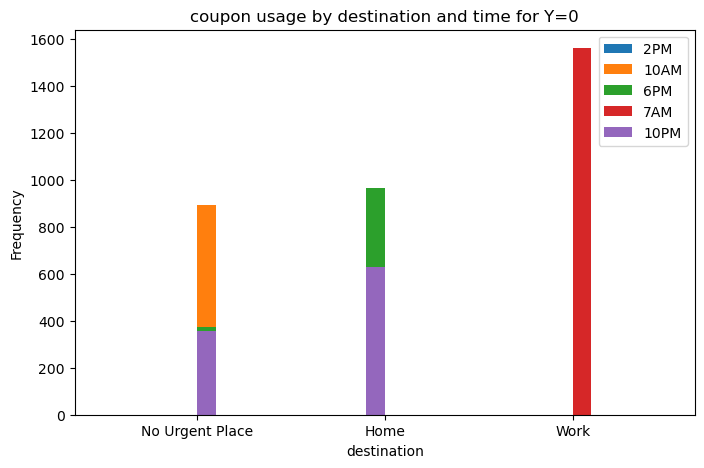

In [37]:
def histo(df, c1, c2, target_value):
    plt.figure(figsize=(8, 5))
    for time in df[c2].unique():
        da = df[(df[c2] == time) & (df['Y'] == target_value)]
        plt.hist(da[c1], label=time)
    plt.xlabel(c1)
    plt.ylabel('Frequency')
    plt.title(f'coupon usage by {c1} and {c2} for Y={target_value}')
    plt.legend()
    plt.show()

# Plot histogram for coupon usage by age group for accepted coupons (Y=1)
histo(v_coupon, 'destination', 'time', 1)

# Plot histogram for coupon usage by age group for rejected coupons (Y=0)
histo(v_coupon, 'destination', 'time', 0)


In [38]:
v_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,e_days
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21.0,Unmarried partner,...,never,1~3,4~8,1~3,0,0,0,1,1,1.000000
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21.0,Unmarried partner,...,never,1~3,4~8,1~3,0,0,0,1,0,0.083333
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21.0,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,1,0.083333
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21.0,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,0.083333
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21.0,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1.000000


In [39]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Define columns to encode
columns_to_encode = ['age', 'maritalStatus', 'education',  'income']

# Apply label encoding for each column
for col in columns_to_encode:
    v_coupon[col + '_encoded'] = label_encoder.fit_transform(v_coupon[col])

# Display the encoded DataFrame
print(v_coupon.head())


       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender   age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21.0  Unmarried partner  ...   
1           Coffee House         2h  Female  21.0  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21.0  Unmarried partner  ...   
3           Coffee House         2h  Female  21.0  Unmarried partner  ...   
4           Coffee House         1d  Female  21.0  Unmarried partner  ...   

   toCoupon_GEQ15min toCoupon_GEQ25min direction_same direction_opp  Y  \
0                  0                 0              0             1  1   
1                  0        

In [40]:
v_coupon.drop(columns=['direction_opp'], inplace=True)

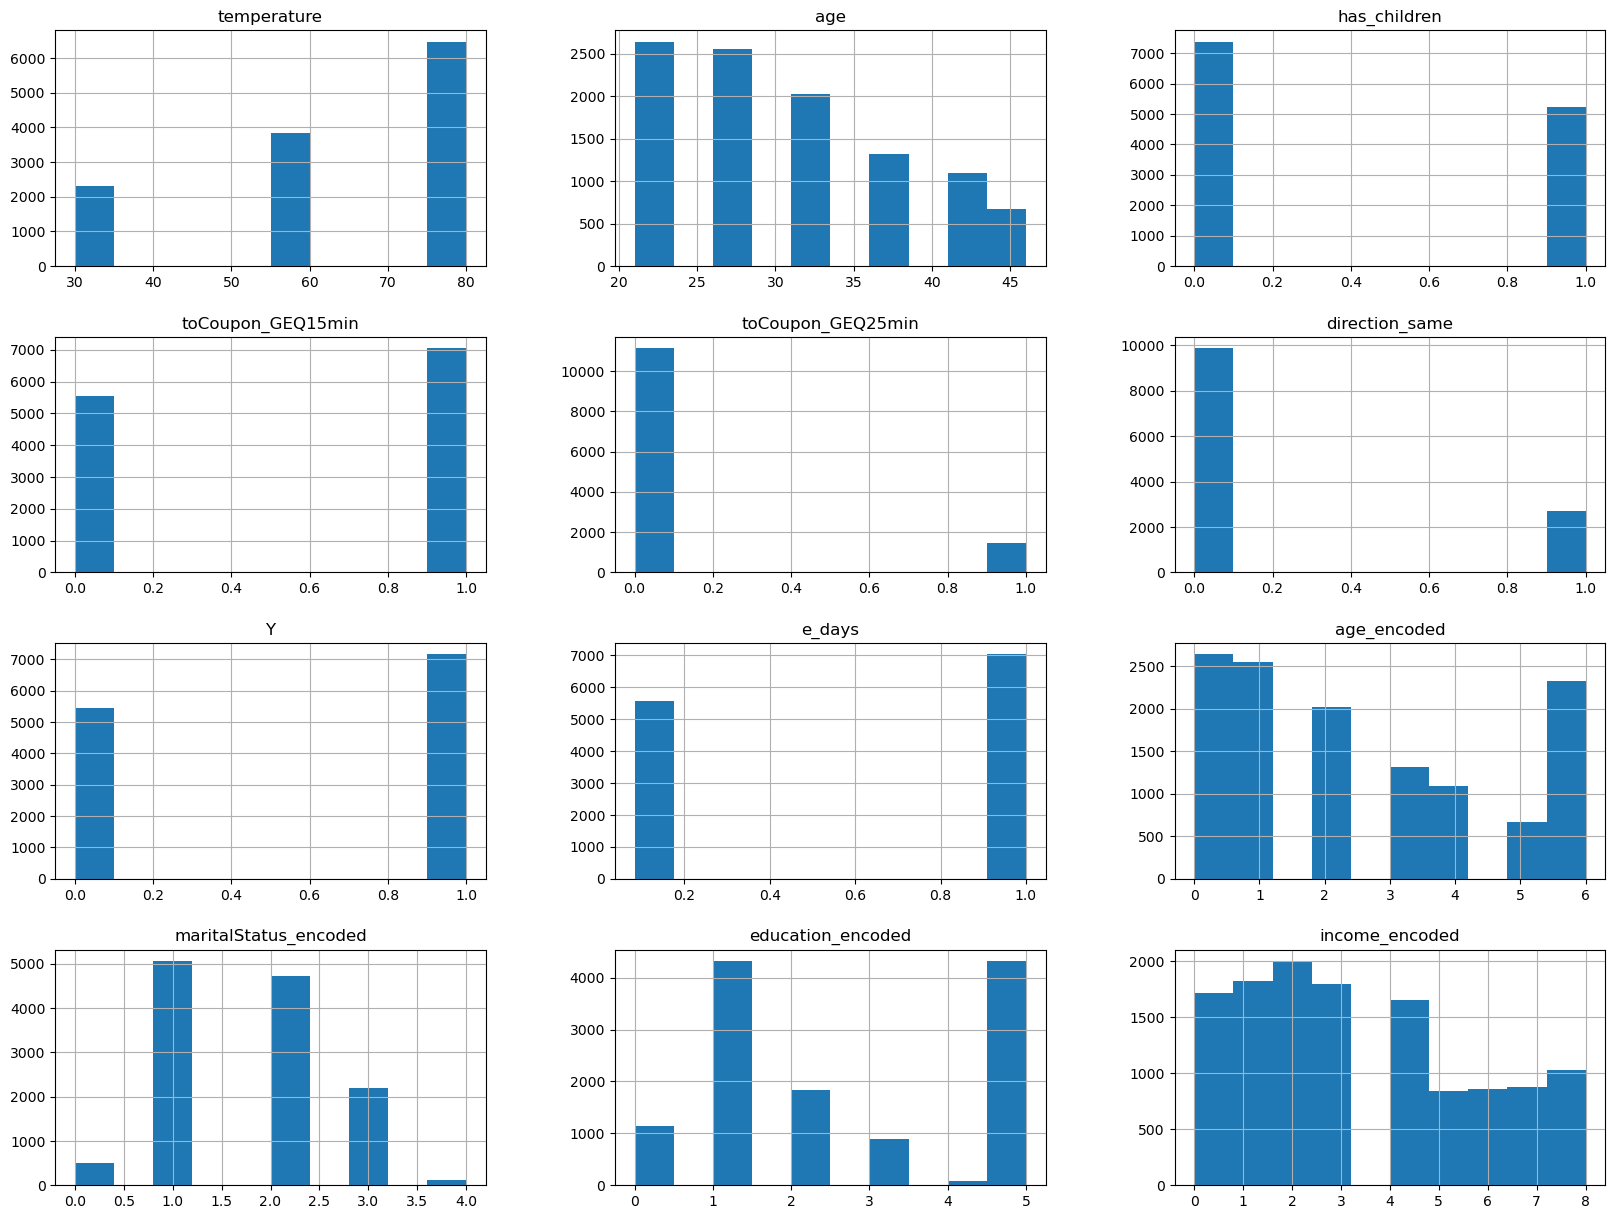

In [41]:
v_coupon.hist(figsize=(20, 15))
plt.show()

In [42]:
import pandas as pd


v_coupon['distance'] = None
v_coupon.loc[v_coupon['toCoupon_GEQ15min'] == 0, 'distance'] = 0
v_coupon.loc[(v_coupon['toCoupon_GEQ15min'] == 1) & (v_coupon['toCoupon_GEQ25min'] == 0), 'distance'] = 1
v_coupon.loc[v_coupon['toCoupon_GEQ25min'] == 1, 'distance'] = 2

# Check for missing values in the distance column
print("Number of missing values in distance column:", v_coupon['distance'].isna().sum())

# Convert distance column to int64
v_coupon['distance'] = v_coupon['distance'].astype('int64')

# Check unique values in distance column
print("Unique values in distance column:", v_coupon['distance'].unique())

# Display value counts for the distance column
print("Value counts for distance column:")
print(v_coupon['distance'].value_counts())

# Drop the toCoupon_GEQ15min and toCoupon_GEQ25min columns
v_coupon.drop(columns=['toCoupon_GEQ15min', 'toCoupon_GEQ25min'], inplace=True)

# Display the modified DataFrame
print(v_coupon.head())


Number of missing values in distance column: 0
Unique values in distance column: [0 1 2]
Value counts for distance column:
distance
1    5596
0    5551
2    1463
Name: count, dtype: int64
       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender   age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21.0  Unmarried partner  ...   
1           Coffee House         2h  Female  21.0  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21.0  Unmarried partner  ...   
3           Coffee House         2h  Female  21.0  Unmarried partner  ...   
4           Coffee House         1d  Female  21.0  Unmarried partn

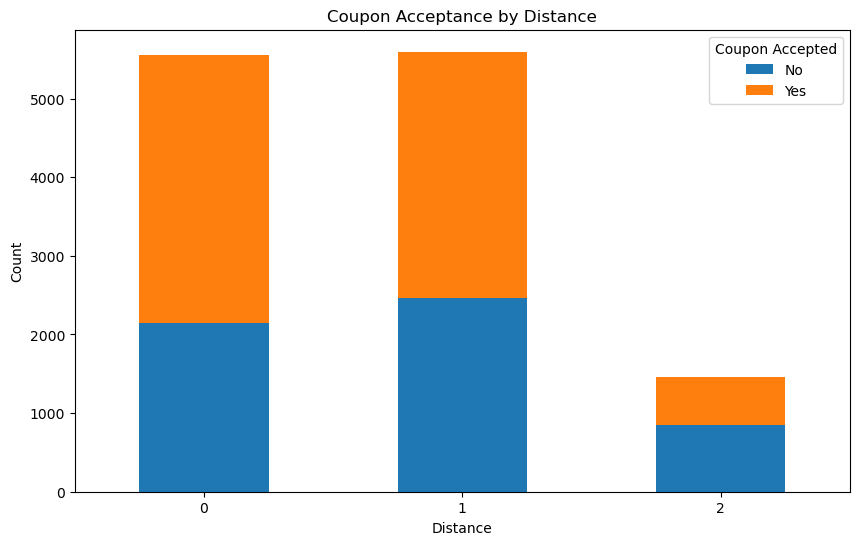

In [43]:
import matplotlib.pyplot as plt

# Group data by distance and coupon acceptance
grouped_data = v_coupon.groupby(['distance', 'Y']).size().unstack()

# Plot the bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Distance')
plt.ylabel('Count')
plt.title('Coupon Acceptance by Distance')
plt.legend(title='Coupon Accepted', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()


In [44]:
frequency_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}
frequency_cols = ['Restaurant20To50', 'RestaurantLessThan20', 
                   'CoffeeHouse', 'Bar']
for col in frequency_cols:
    v_coupon[col] = v_coupon[col].map(frequency_map)

In [45]:
v_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,RestaurantLessThan20,Restaurant20To50,direction_same,Y,e_days,age_encoded,maritalStatus_encoded,education_encoded,income_encoded,distance
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21.0,Unmarried partner,...,3,2,0,1,1.000000,0,3,5,3,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21.0,Unmarried partner,...,3,2,0,0,0.083333,0,3,5,3,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21.0,Unmarried partner,...,3,2,0,1,0.083333,0,3,5,3,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21.0,Unmarried partner,...,3,2,0,0,0.083333,0,3,5,3,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21.0,Unmarried partner,...,3,2,0,0,1.000000,0,3,5,3,1


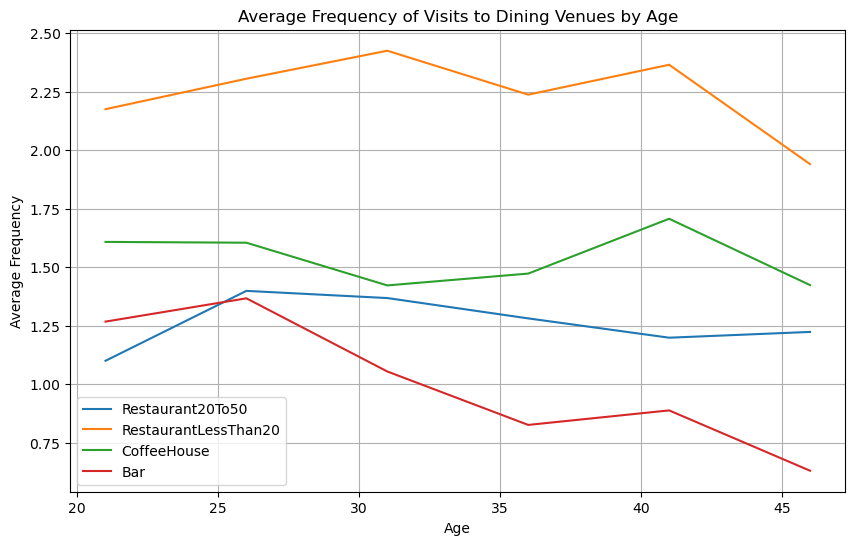

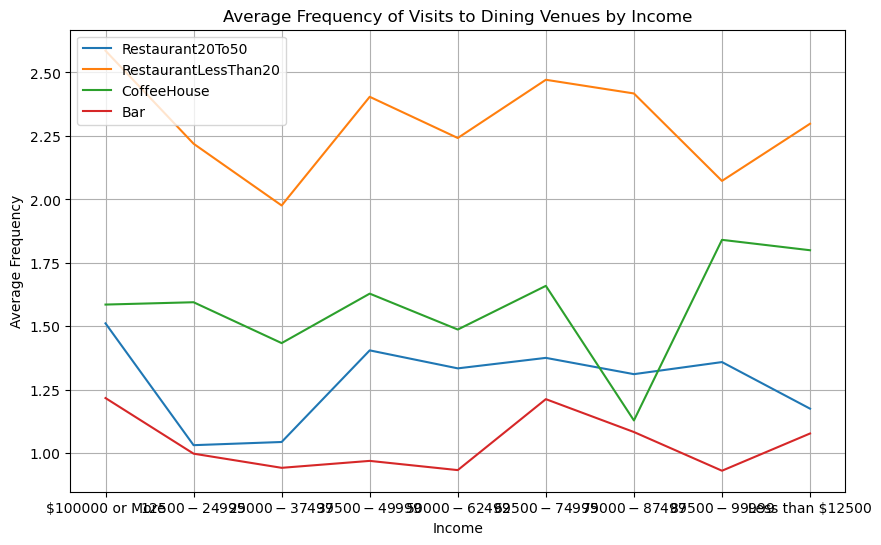

In [46]:
demographic_factors = ['age', 'income']  # Add more factors as needed

for factor in demographic_factors:
    plt.figure(figsize=(10, 6))
    for col in frequency_cols:
        grouped = v_coupon.groupby(factor)[col].mean()
        plt.plot(grouped.index, grouped.values, label=col)

    plt.xlabel(factor.capitalize())
    plt.ylabel('Average Frequency')
    plt.title(f'Average Frequency of Visits to Dining Venues by {factor.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'CarryAway' column
v_coupon['CarryAway_encoded'] = label_encoder.fit_transform(v_coupon['CarryAway'].astype(str))

# Encode the 'expiration' column
v_coupon['expiration_encoded'] = label_encoder.fit_transform(v_coupon['expiration'].astype(str))

# Now, check the data types to ensure they are encoded
print(v_coupon.dtypes)


destination               object
passanger                 object
weather                   object
temperature                int64
time                      object
coupon                    object
expiration                object
gender                    object
age                      float64
maritalStatus             object
has_children               int64
education                 object
occupation                object
income                    object
Bar                        int64
CoffeeHouse                int64
CarryAway                 object
RestaurantLessThan20       int64
Restaurant20To50           int64
direction_same             int64
Y                          int64
e_days                   float64
age_encoded                int64
maritalStatus_encoded      int32
education_encoded          int32
income_encoded             int32
distance                   int64
CarryAway_encoded          int32
expiration_encoded         int32
dtype: object


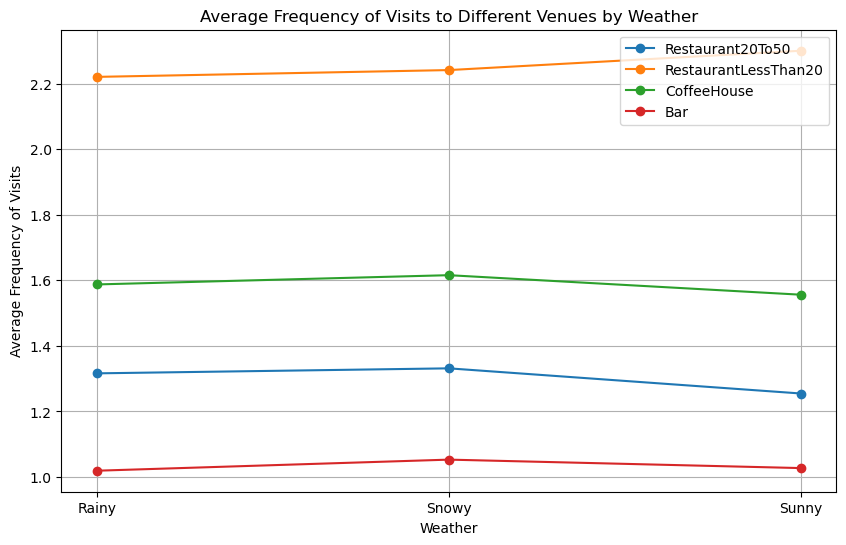

In [48]:
import matplotlib.pyplot as plt

# Group the data by weather and calculate the mean frequency of visits for each venue type
grouped_data = v_coupon.groupby('weather')[['Restaurant20To50', 'RestaurantLessThan20', 'CoffeeHouse', 'Bar']].mean()

# Plot the data
plt.figure(figsize=(10, 6))
for column in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[column], marker='o', label=column)

# Add labels and title
plt.xlabel('Weather')
plt.ylabel('Average Frequency of Visits')
plt.title('Average Frequency of Visits to Different Venues by Weather')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [49]:
bar_c = v_coupon[v_coupon['coupon']=='Bar'].copy()
bar_c.shape

(2010, 29)

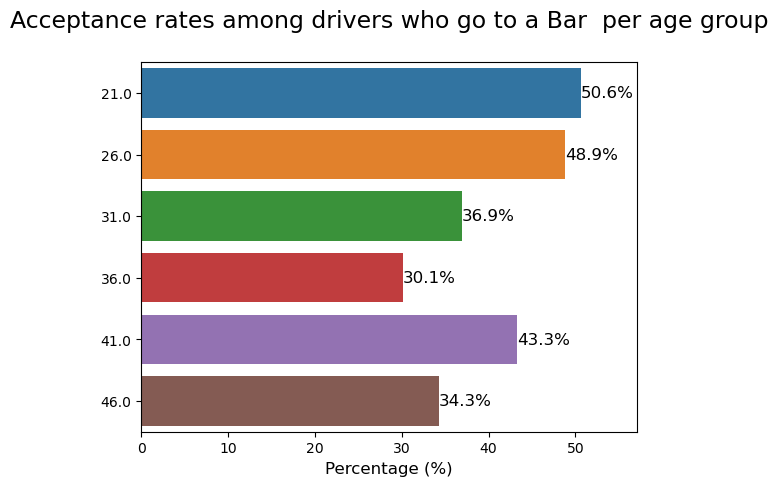

In [50]:
# calculate and plot the acceptance rate among drivers who go to a coffee house per age group
groupby_col = bar_c[~bar_c['Bar'].isin(['never'])].groupby('age')['Y'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()
 
g = sns.barplot(y='age', x='Percentage (%)', orient="h", 
                data=groupby_col[groupby_col['Y']==1].sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left,right+4)
g.set_ylabel('')
g.set_title('Acceptance rates among drivers who go to a Bar  per age group\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize = 12)

# add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)

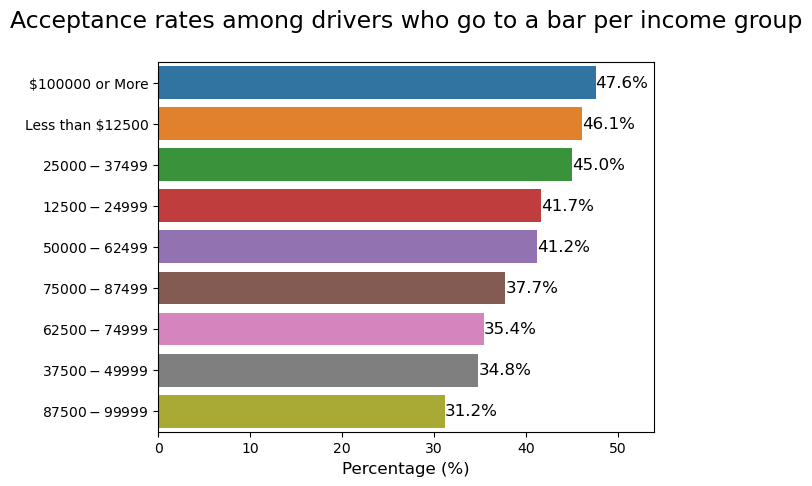

In [51]:
# calculate and plot the acceptance rate among drivers who go to a coffee house per income group
groupby_col = bar_c[~bar_c['Bar'].isin(['never'])].groupby('income')['Y'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()
 
g = sns.barplot(y='income', x='Percentage (%)', orient="h", 
                data=groupby_col[groupby_col['Y']==1].sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left,right+4)
g.set_ylabel('')
g.set_title('Acceptance rates among drivers who go to a bar per income group\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize = 12)

# add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)

In [52]:
coffee_c = v_coupon[v_coupon['coupon']=='Coffee House'].copy()
coffee_c.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,direction_same,Y,e_days,age_encoded,maritalStatus_encoded,education_encoded,income_encoded,distance,CarryAway_encoded,expiration_encoded
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21.0,Unmarried partner,...,0,0,0.083333,0,3,5,3,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21.0,Unmarried partner,...,0,0,0.083333,0,3,5,3,1,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21.0,Unmarried partner,...,0,0,1.000000,0,3,5,3,1,0,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21.0,Unmarried partner,...,0,1,0.083333,0,3,5,3,1,0,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21.0,Unmarried partner,...,0,0,0.083333,0,3,5,3,0,0,1


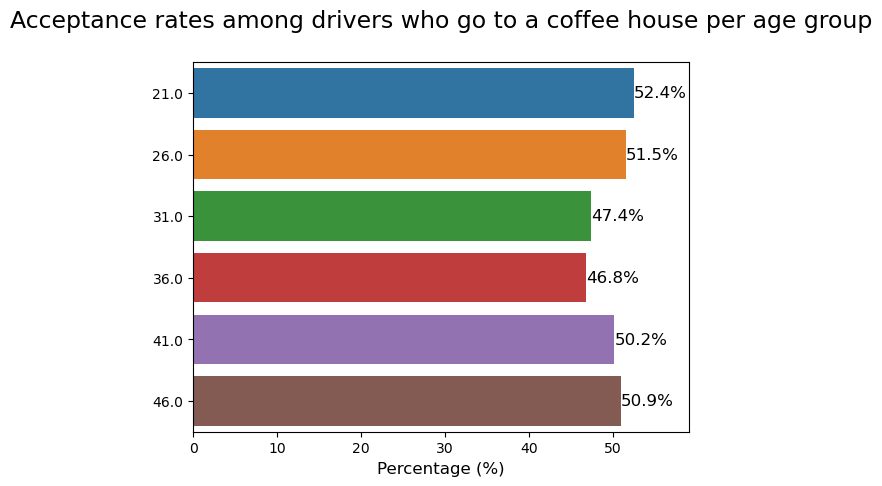

In [53]:
# calculate and plot the acceptance rate among drivers who go to a coffee house per age group
groupby_col = coffee_c[~coffee_c['CoffeeHouse'].isin(['never'])].groupby('age')['Y'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()
 
g = sns.barplot(y='age', x='Percentage (%)', orient="h", 
                data=groupby_col[groupby_col['Y']==1].sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left,right+4)
g.set_ylabel('')
g.set_title('Acceptance rates among drivers who go to a coffee house per age group\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize = 12)

# add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)



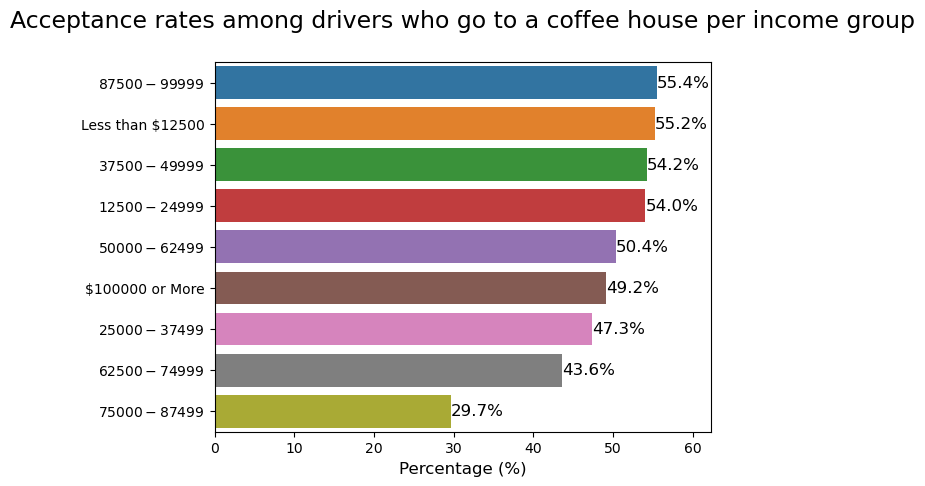

In [54]:
# calculate and plot the acceptance rate among drivers who go to a coffee house per income group
groupby_col = coffee_c[~coffee_c['CoffeeHouse'].isin(['never'])].groupby('income')['Y'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()
 
g = sns.barplot(y='income', x='Percentage (%)', orient="h", 
                data=groupby_col[groupby_col['Y']==1].sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left,right+4)
g.set_ylabel('')
g.set_title('Acceptance rates among drivers who go to a coffee house per income group\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize = 12)

# add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)

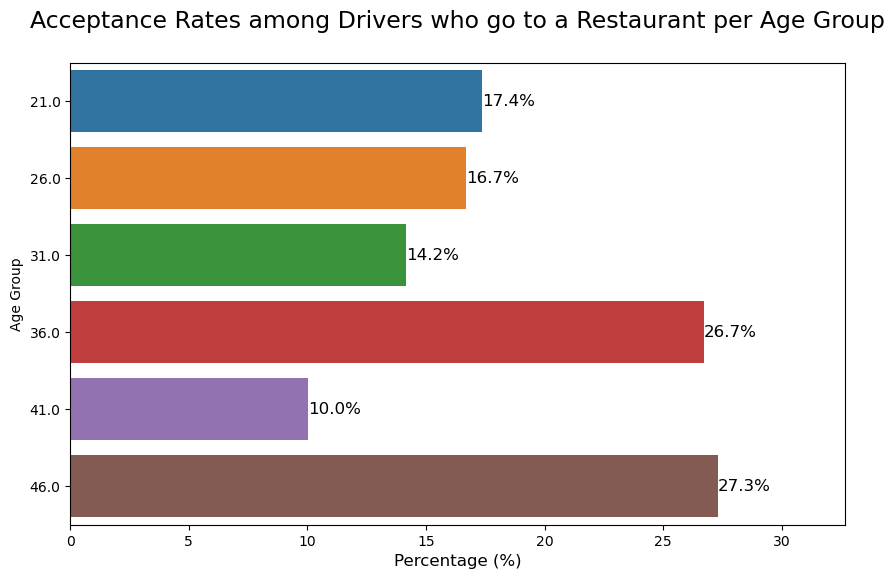

In [55]:
# Calculate acceptance rate among drivers who go to a restaurant per age group
groupby_col = v_coupon.groupby('age')['RestaurantLessThan20'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()

# Filter out rows where restaurant visits are 'never'
groupby_col = groupby_col[~groupby_col['RestaurantLessThan20'].isin(['never'])]

# Filter for drivers who accepted the coupon (Y=1)
groupby_col_accepted = groupby_col[groupby_col['RestaurantLessThan20'] == 1]

# Plot the acceptance rates
plt.figure(figsize=(10, 6))
g = sns.barplot(y='age', x='Percentage (%)', orient="h", data=groupby_col_accepted.sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left, right+4)
g.set_ylabel('Age Group')
g.set_title('Acceptance Rates among Drivers who go to a Restaurant per Age Group\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize=12)

# Add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)

plt.show()


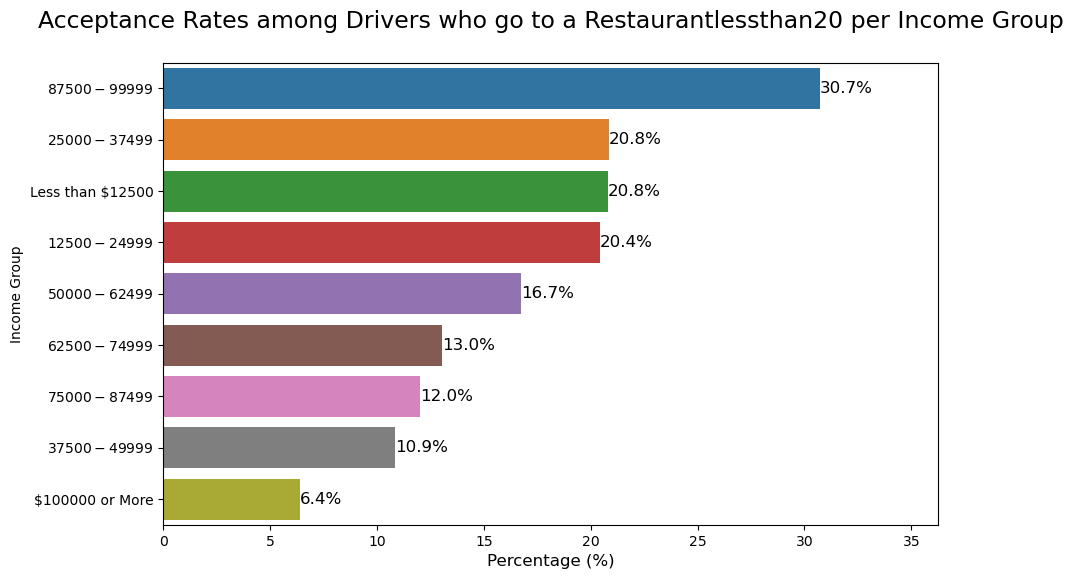

In [56]:
# Calculate acceptance rate among drivers who go to a restaurant per income group
groupby_income = v_coupon.groupby('income')['RestaurantLessThan20'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()

# Filter out rows where restaurant visits are 'never'
groupby_income = groupby_income[~groupby_income['RestaurantLessThan20'].isin(['never'])]

# Filter for drivers who accepted the coupon (Y=1)
groupby_income_accepted = groupby_income[groupby_income['RestaurantLessThan20'] == 1]

# Plot the acceptance rates
plt.figure(figsize=(10, 6))
g = sns.barplot(y='income', x='Percentage (%)', orient="h", data=groupby_income_accepted.sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left, right+4)
g.set_ylabel('Income Group')
g.set_title('Acceptance Rates among Drivers who go to a Restaurantlessthan20 per Income Group\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize=12)

# Add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)

plt.show()


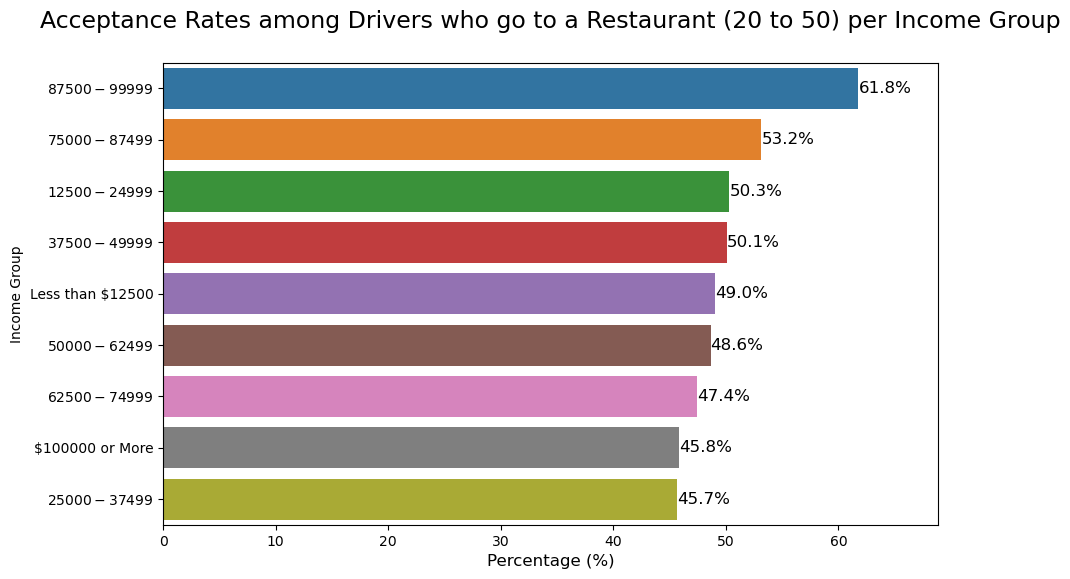

In [57]:
# Calculate acceptance rate among drivers who go to a restaurant per income group
groupby_income = v_coupon.groupby('income')['Restaurant20To50'].value_counts(normalize=True).mul(100).rename('Percentage (%)').reset_index()

# Filter out rows where restaurant visits are 'never'
groupby_income = groupby_income[~groupby_income['Restaurant20To50'].isin(['never'])]

# Filter for drivers who accepted the coupon (Y=1)
groupby_income_accepted = groupby_income[groupby_income['Restaurant20To50'] == 1]

# Plot the acceptance rates
plt.figure(figsize=(10, 6))
g = sns.barplot(y='income', x='Percentage (%)', orient="h", data=groupby_income_accepted.sort_values('Percentage (%)', ascending=False))
left, right = g.get_xlim()
g.set_xlim(left, right+4)
g.set_ylabel('Income Group')
g.set_title('Acceptance Rates among Drivers who go to a Restaurant (20 to 50) per Income Group\n', fontsize=17)
g.set_xlabel('Percentage (%)', fontsize=12)

# Add the percentages as text to the bars
for container in g.containers:
    g.bar_label(container, fmt='%.1f%%', fontsize=12)

plt.show()


In [58]:
v_coupon = pd.read_csv(r"C:\Users\komma\Downloads\Documents\in-vehicle-coupon-recommendation.csv")

In [59]:
v_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [60]:

counts = v_coupon.groupby(['time', 'coupon']).size().reset_index(name='count')

# Display the counts
print(counts)


    time                 coupon  count
0   10AM                    Bar    444
1   10AM  Carry out & Take away    517
2   10AM           Coffee House    899
3   10AM      Restaurant(20-50)    112
4   10AM        Restaurant(<20)    303
5   10PM                    Bar    402
6   10PM  Carry out & Take away    461
7   10PM           Coffee House    297
8   10PM      Restaurant(20-50)    381
9   10PM        Restaurant(<20)    465
10   2PM                    Bar    118
11   2PM  Carry out & Take away    218
12   2PM           Coffee House    794
13   2PM      Restaurant(20-50)    182
14   2PM        Restaurant(<20)    697
15   6PM                    Bar    566
16   6PM  Carry out & Take away    435
17   6PM           Coffee House   1093
18   6PM      Restaurant(20-50)    388
19   6PM        Restaurant(<20)    748
20   7AM                    Bar    487
21   7AM  Carry out & Take away    762
22   7AM           Coffee House    913
23   7AM      Restaurant(20-50)    429
24   7AM        Restauran

In [61]:
v_coupon = v_coupon.replace({
    'expiration': {'2h': 0, '1d': 1},
    'age': {'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4, '50plus' :5, 'below21' :6},
    'education': {
        'Some High School': 0, 
        'High School Graduate': 1, 
        'Some college - no degree': 2, 
        'Associates degree': 3, 
        'Bachelors degree': 4, 
        'Graduate degree (Masters or Doctorate)': 5
    },
    'Bar': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'CoffeeHouse': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'CarryAway': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'Restaurant20To50': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'RestaurantLessThan20' : {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'income': {
        'Less than $12500': 0, 
        '$12500 - $24999': 1, 
        '$25000 - $37499': 2, 
        '$37500 - $49999': 3, 
        '$50000 - $62499': 4, 
        '$62500 - $74999': 5, 
        '$75000 - $87499': 6, 
        '$87500 - $99999': 7, 
        '$100000 or More': 8
    },
    'time': {'7AM': 0, '10AM': 1, '2PM': 2, '6PM': 3, '10PM': 4}
})
v_coupon = v_coupon.replace({
    'coupon': {
        'Bar': 0,
        'Carry out & Take away': 1,
        'Coffee House': 2,
        'Restaurant(20-50)': 3,
        'Restaurant(<20)': 4
    }
})
v_coupon = v_coupon.replace({
    'weather': {
        'Sunny': 0,
        'Rainy': 1,
        'Snowy': 2
    }
})



In [63]:
# Filter the DataFrame for y=0 and y=1 separately
v_coupon_y0 = v_coupon[v_coupon['Y'] == 0]
v_coupon_y1 = v_coupon[v_coupon['Y'] == 1]

# Group by 'time' and 'coupon' columns and count occurrences for y=0
counts_y0 = v_coupon_y0.groupby(['time', 'coupon']).size().reset_index(name='Rejected')

# Group by 'time' and 'coupon' columns and count occurrences for y=1
counts_y1 = v_coupon_y1.groupby(['time', 'coupon']).size().reset_index(name='Accepted')

# Merge the two count DataFrames on 'time' and 'coupon'
merged_counts = counts_y0.merge(counts_y1, on=['time', 'coupon'], how='outer').fillna(0)

# Display the merged counts
print(merged_counts)


    time  coupon  Rejected  Accepted
0      0       0       309       178
1      0       1       263       499
2      0       2       506       407
3      0       3       258       171
4      0       4       239       334
5      1       0       283       161
6      1       1       154       363
7      1       2       323       576
8      1       3        43        69
9      1       4        88       215
10     2       0        78        40
11     2       1        29       189
12     2       2       359       435
13     2       3        84        98
14     2       4       130       567
15     3       0       302       264
16     3       1        76       359
17     3       2       642       451
18     3       3       193       195
19     3       4       129       619
20     4       0       218       184
21     4       1       111       350
22     4       2       171       126
23     4       3       256       125
24     4       4       230       235


C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

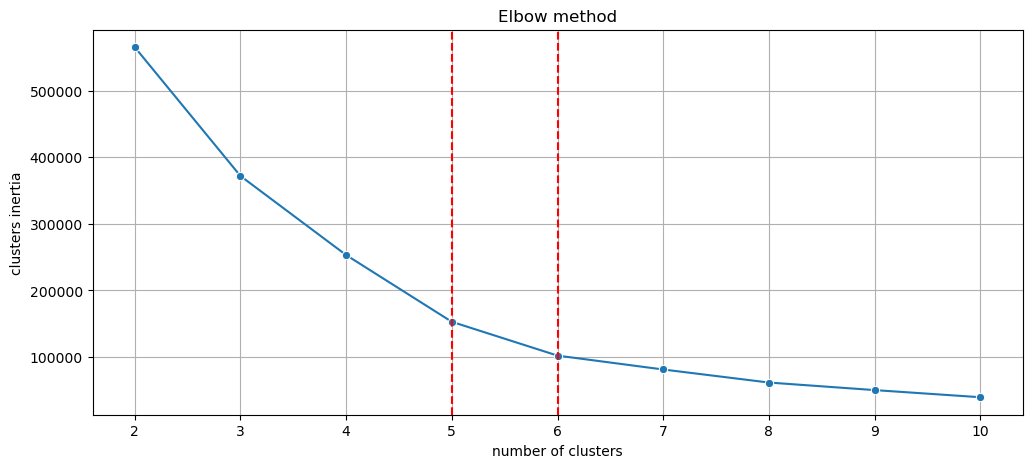

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_numerics = merged_counts[['time','coupon','Rejected','Accepted']]
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

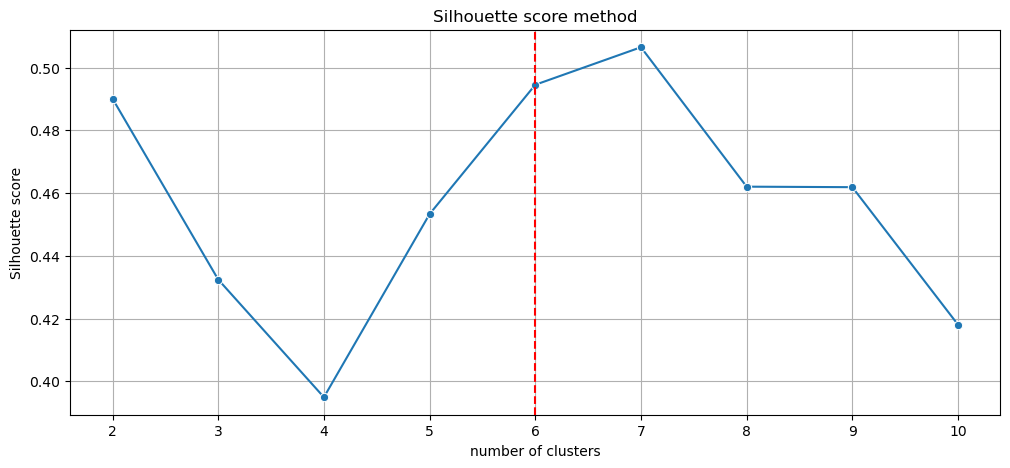

In [65]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points



C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


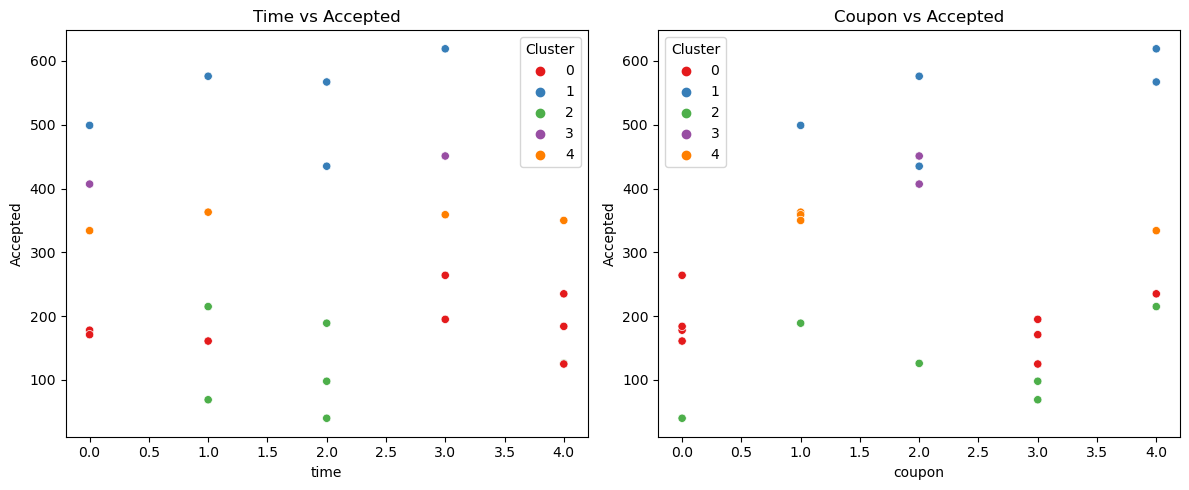

In [67]:

# Plotting
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# Assuming 'time' and 'coupon' are available in 'merged_counts'
scat_1 = sns.scatterplot(x='time', y='Accepted', data=KM5_clustered, hue='Cluster', ax=axes[0], palette='Set1', legend='full')
axes[0].set_title("Time vs Accepted")

# Assuming 'coupon' and 'accepted' are available in 'merged_counts'
scat_2 = sns.scatterplot(x='coupon', y='Accepted', data=KM5_clustered, hue='Cluster', ax=axes[1], palette='Set1', legend='full')
axes[1].set_title("Coupon vs Accepted")

plt.tight_layout()
plt.show()

In [68]:
# Filter the DataFrame for y=0 and y=1 separately
v_coupon_y0 = v_coupon[v_coupon['Y'] == 0]
v_coupon_y1 = v_coupon[v_coupon['Y'] == 1]

# Group by 'time' and 'coupon' columns and count occurrences for y=0
counts_y0 = v_coupon_y0.groupby(['passanger', 'coupon']).size().reset_index(name='Rejected')

# Group by 'time' and 'coupon' columns and count occurrences for y=1
counts_y1 = v_coupon_y1.groupby(['passanger', 'coupon']).size().reset_index(name='Accepted')

# Merge the two count DataFrames on 'time' and 'coupon'
merged_counts = counts_y0.merge(counts_y1, on=['passanger', 'coupon'], how='outer').fillna(0)

# Display the merged counts
print(merged_counts)


    passanger  coupon  Rejected  Accepted
0       Alone       0       711       489
1       Alone       1       383      1022
2       Alone       2      1268       988
3       Alone       3       583       426
4       Alone       4       519       916
5   Friend(s)       0       149       188
6   Friend(s)       1       179       560
7   Friend(s)       2       495       733
8   Friend(s)       3        90        78
9   Friend(s)       4       164       662
10     Kid(s)       0       163        43
11     Kid(s)       1        45       107
12     Kid(s)       2       107       100
13     Kid(s)       3       109        65
14     Kid(s)       4        74       193
15    Partner       0       167       107
16    Partner       1        26        71
17    Partner       2       131       174
18    Partner       3        52        89
19    Partner       4        59       199


C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

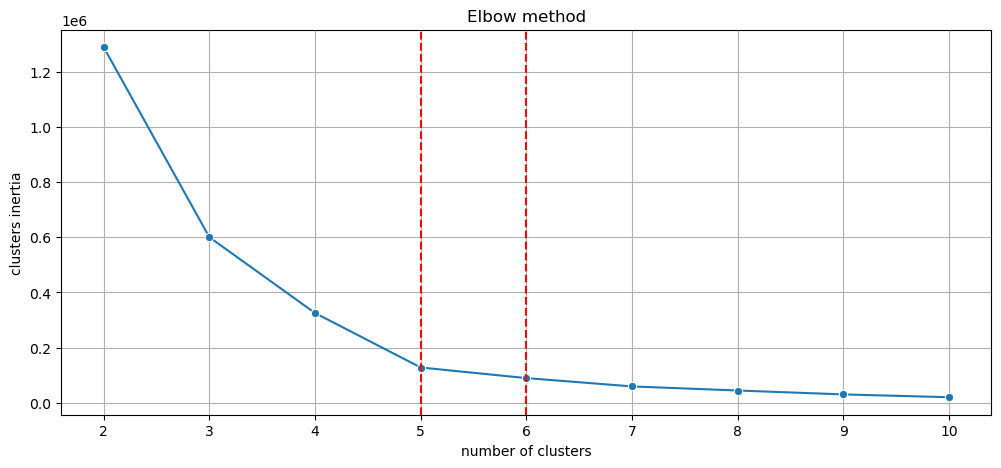

In [70]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()
merged_counts['passanger'] = le.fit_transform(merged_counts['passanger'])
X_numerics = merged_counts[['passanger','coupon','Rejected','Accepted']]
## Elbow Method
## In order to find the optimal K number, look at the "elbow" in the graph.
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

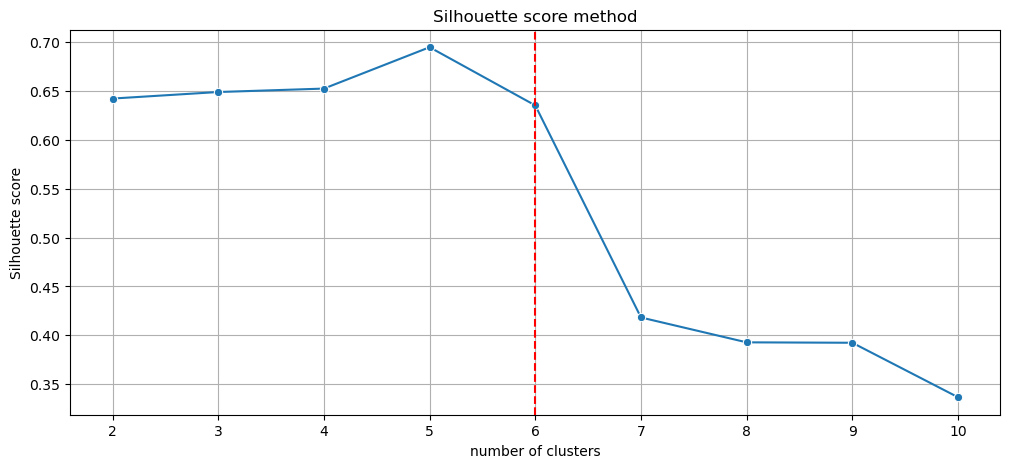

In [71]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


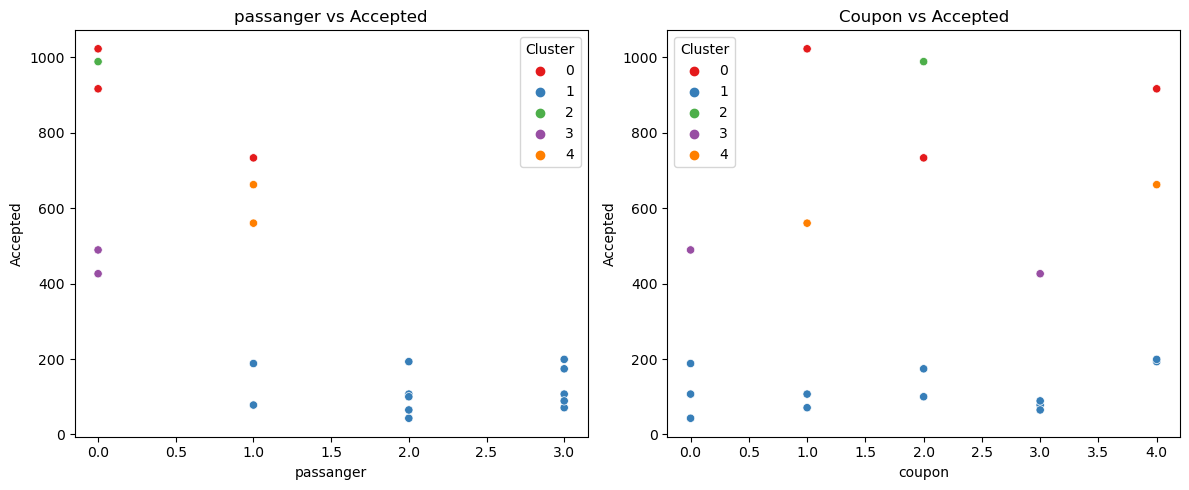

In [72]:

KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

# Plotting
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

# Assuming 'time' and 'coupon' are available in 'merged_counts'
scat_1 = sns.scatterplot(x='passanger', y='Accepted', data=KM5_clustered, hue='Cluster', ax=axes[0], palette='Set1', legend='full')
axes[0].set_title("passanger vs Accepted")

# Assuming 'coupon' and 'accepted' are available in 'merged_counts'
scat_2 = sns.scatterplot(x='coupon', y='Accepted', data=KM5_clustered, hue='Cluster', ax=axes[1], palette='Set1', legend='full')
axes[1].set_title("Coupon vs Accepted")

plt.tight_layout()
plt.show()


In [73]:
# Filter the DataFrame for y=0 and y=1 separately
v_coupon_y0 = v_coupon[v_coupon['Y'] == 0]
v_coupon_y1 = v_coupon[v_coupon['Y'] == 1]

# Group by 'time' and 'coupon' columns and count occurrences for y=0
counts_y0 = v_coupon_y0.groupby(['weather', 'coupon']).size().reset_index(name='Rejected')

# Group by 'time' and 'coupon' columns and count occurrences for y=1
counts_y1 = v_coupon_y1.groupby(['weather', 'coupon']).size().reset_index(name='Accepted')

# Merge the two count DataFrames on 'time' and 'coupon'
merged_counts = counts_y0.merge(counts_y1, on=['weather', 'coupon'], how='outer').fillna(0)

# Display the merged counts
print(merged_counts)
import pandas as pd

# Duplicating the DataFrame 500 times
merged_counts = pd.concat([merged_counts] * 500, ignore_index=True)

# Displaying the duplicated DataFrame
print(merged_counts)



    weather  coupon  Rejected  Accepted
0         0       0       753       595
1         0       1       419      1348
2         0       2      1721      1746
3         0       3       668       579
4         0       4       519      1721
5         1       0       274       156
6         1       1       124       195
7         1       2       108       118
8         1       3        40        25
9         1       4       104        66
10        2       0       163        76
11        2       1        90       217
12        2       2       172       131
13        2       3       126        54
14        2       4       193       183
      weather  coupon  Rejected  Accepted
0           0       0       753       595
1           0       1       419      1348
2           0       2      1721      1746
3           0       3       668       579
4           0       4       519      1721
...       ...     ...       ...       ...
7495        2       0       163        76
7496        2       1   

C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

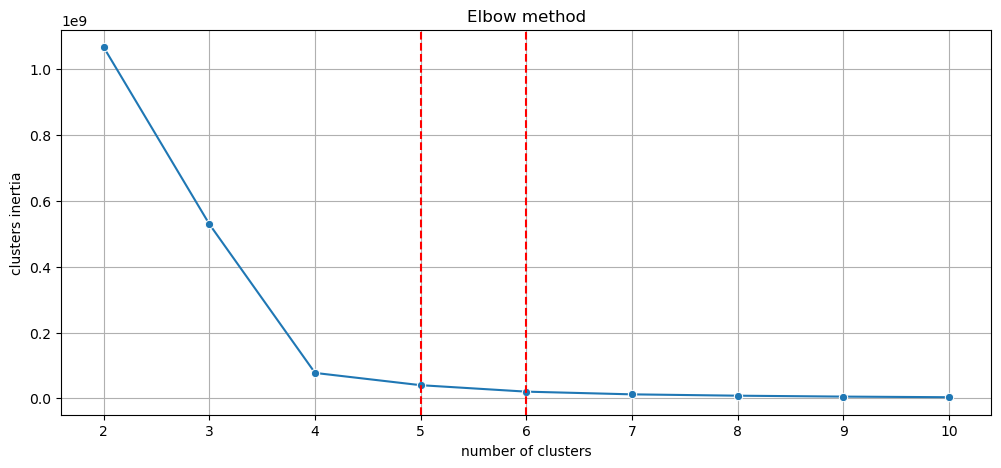

In [74]:
merged_counts['weather'] = le.fit_transform(merged_counts['weather'])
X_numerics = merged_counts[['weather','coupon','Rejected','Accepted']]
## Elbow Method
## In order to find the optimal K number, look at the "elbow" in the graph.
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Accepted vs coupon')

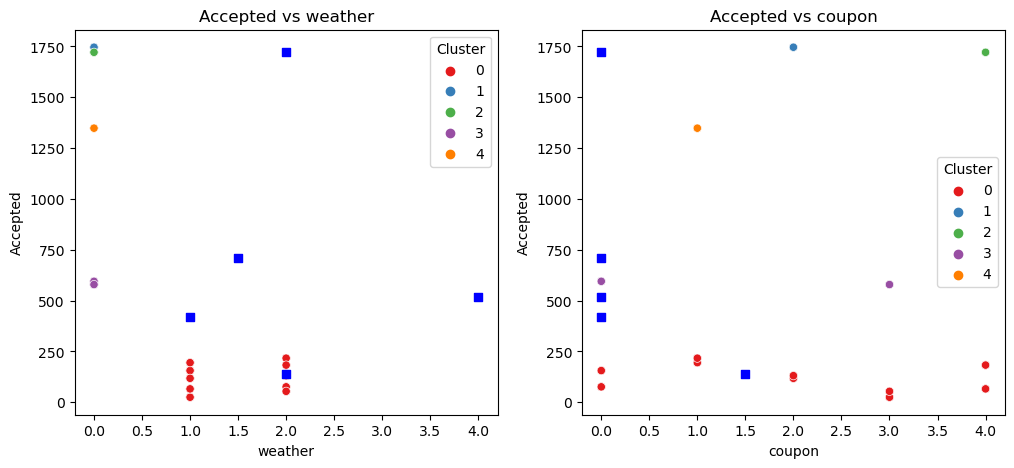

In [75]:

KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='weather', y='Accepted',
                         data=KM5_clustered, hue='Cluster',
                         ax=axes[0], palette='Set1', legend='full')

scat_2 = sns.scatterplot(x='coupon', y='Accepted',
                         data=KM5_clustered, hue='Cluster',
                         ax=axes[1], palette='Set1', legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1], KM_5_clusters.cluster_centers_[:,2],
                marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0], KM_5_clusters.cluster_centers_[:,2],
                marker='s', s=40, c="blue")

axes[0].set_title("Accepted vs weather")
axes[1].set_title("Accepted vs coupon")




C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Rejected vs coupon')

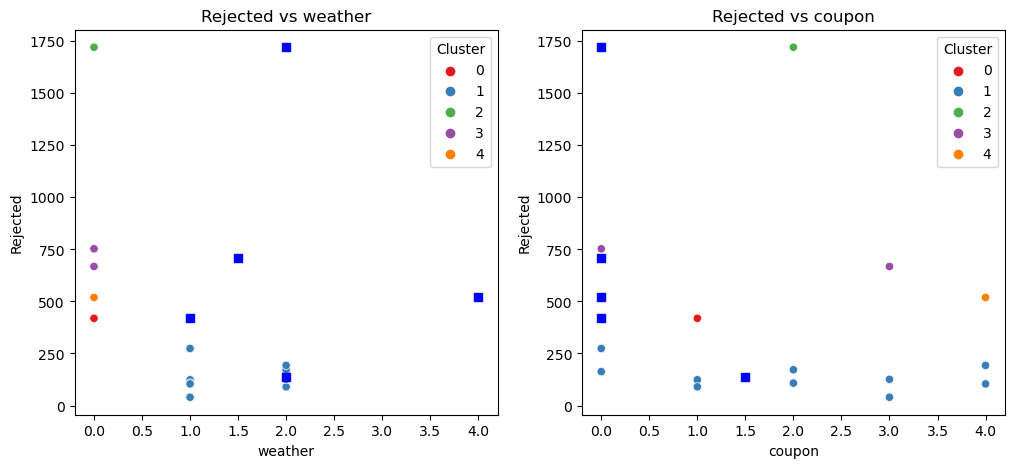

In [76]:

KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_ # append labels to points

fig1, (axes) = plt.subplots(1,2,figsize=(12,5))

scat_1 = sns.scatterplot(x='weather', y='Rejected',
                         data=KM5_clustered, hue='Cluster',
                         ax=axes[0], palette='Set1', legend='full')

scat_2 = sns.scatterplot(x='coupon', y='Rejected',
                         data=KM5_clustered, hue='Cluster',
                         ax=axes[1], palette='Set1', legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1], KM_5_clusters.cluster_centers_[:,2],
                marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0], KM_5_clusters.cluster_centers_[:,2],
                marker='s', s=40, c="blue")

axes[0].set_title("Rejected vs weather")
axes[1].set_title("Rejected vs coupon")




C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\komma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

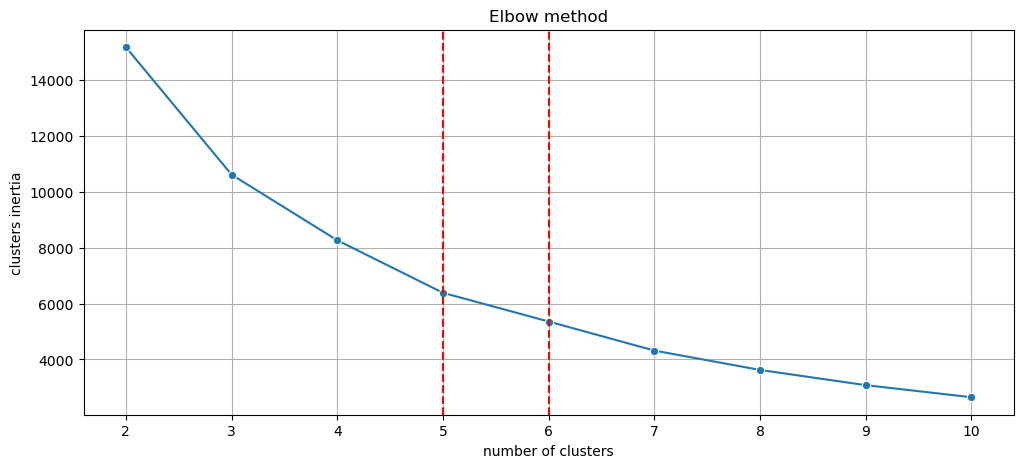

In [77]:
X_numerics = v_coupon[['coupon','weather','Y']]
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_numerics)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_numerics, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(x=n_clusters, y=clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(5, ls="--", c="red")
ax.axvline(6, ls="--", c="red")
plt.grid()
plt.show()

In [78]:

v_coupon = v_coupon.replace({
    'destination': {
        'Home': 0,
        'No Urgent Place': 1,
        'Work': 2
    }
})
v_coupon = v_coupon.replace({
    'passanger': {
        'Alone': 0,
        'Friend(s)': 1,
        'Partner': 2,
        'Kid(s)': 3
        # Add more mappings if needed
    },
    'maritalStatus': {
        'Single': 0,
        'Unmarried partner': 1,
        'Married partner' :5,
        'Married': 2,
        'Divorced': 3,
        'Widowed': 4
        # Add more mappings if needed
    }
})

v_coupon.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,0,55,2,4,1,Female,21,1,...,0.0,NaN,3.0,2.0,1,0,0,0,1,1
1,1,1,0,80,1,2,0,Female,21,1,...,0.0,NaN,3.0,2.0,1,0,0,0,1,0
2,1,1,0,80,1,1,0,Female,21,1,...,0.0,NaN,3.0,2.0,1,1,0,0,1,1
3,1,1,0,80,2,2,0,Female,21,1,...,0.0,NaN,3.0,2.0,1,1,0,0,1,0
4,1,1,0,80,2,2,1,Female,21,1,...,0.0,NaN,3.0,2.0,1,1,0,0,1,0


In [80]:
#v_coupon = v_coupon.drop(columns=['Car'])
v_coupon = v_coupon.drop(columns=['gender'])


KeyError: "['gender'] not found in axis"

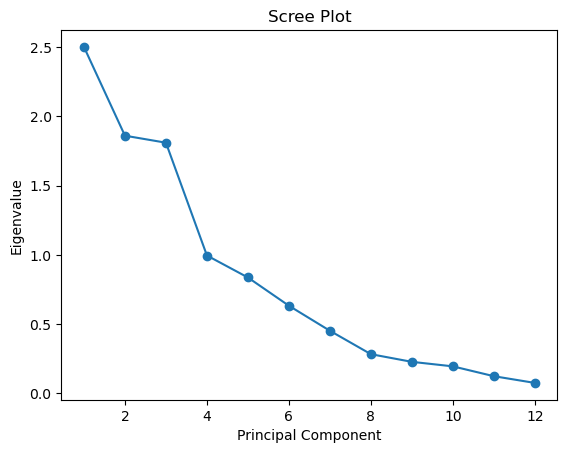

Eigenvalues:
Eigenvalue 1: 2.5020749022665063
Eigenvalue 2: 1.8611448586866035
Eigenvalue 3: 1.8104864090104598
Eigenvalue 4: 0.9960187093253731
Eigenvalue 5: 0.837284811702012
Eigenvalue 6: 0.6333476506171065
Eigenvalue 7: 0.45261120584650205
Eigenvalue 8: 0.28359379629137943
Eigenvalue 9: 0.2282501842142514
Eigenvalue 10: 0.19566422738529707
Eigenvalue 11: 0.12460145672921152
Eigenvalue 12: 0.0760499434851237


In [94]:
#v_coupon = v_coupon.drop(columns=['car'])
new_features = v_coupon[['CoffeeHouse','expiration','passanger','destination','coupon','time','toCoupon_GEQ25min','toCoupon_GEQ15min','Bar','Restaurant20To50','weather','Y']]
le = LabelEncoder()
v_coupon['occupation'] = le.fit_transform(v_coupon['occupation'])
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Assuming your DataFrame is named 'df'

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
imputed_df = imputer.fit_transform(new_features)

# Perform PCA
pca = PCA(n_components=len(new_features.columns))
pca.fit(imputed_df)

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Calculate eigenvalue ratio
eigenvalue_ratio = eigenvalues / sum(eigenvalues)

# Plot scree plot
import matplotlib.pyplot as plt
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue}")

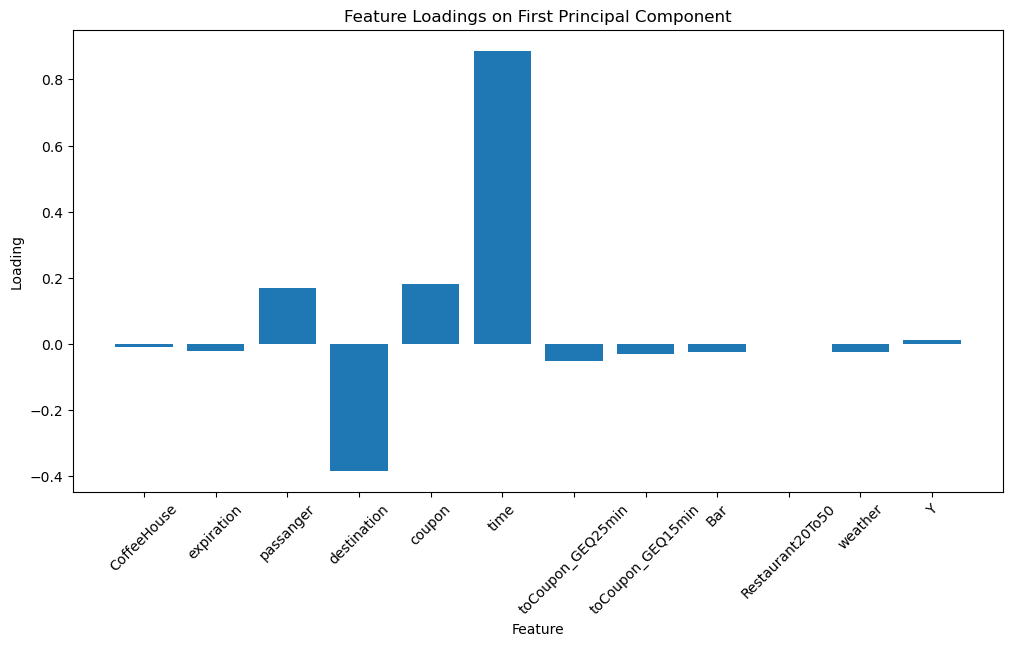

In [95]:
# Extract feature loadings
loadings = pca.components_

# Create a DataFrame to display feature loadings
loadings_df = pd.DataFrame(loadings, columns=new_features.columns)

# Plot feature loadings
plt.figure(figsize=(12, 6))
plt.bar(range(len(loadings_df.columns)), loadings_df.iloc[0], align='center')
plt.xticks(range(len(loadings_df.columns)), loadings_df.columns, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.title('Feature Loadings on First Principal Component')
plt.show()


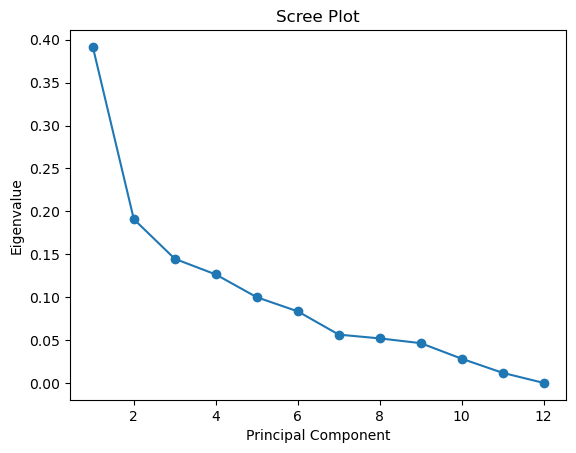

Eigenvalues:
Feature 1: 0.3916098262478176
Feature 2: 0.1908349696651702
Feature 3: 0.14464148445243374
Feature 4: 0.12640268968707213
Feature 5: 0.09987349320905743
Feature 6: 0.08340318364722162
Feature 7: 0.05629300247269318
Feature 8: 0.051897630397621256
Feature 9: 0.04634316525077589
Feature 10: 0.028182039750275344
Feature 11: 0.01173215586226098
Feature 12: 2.2660266846832034e-33


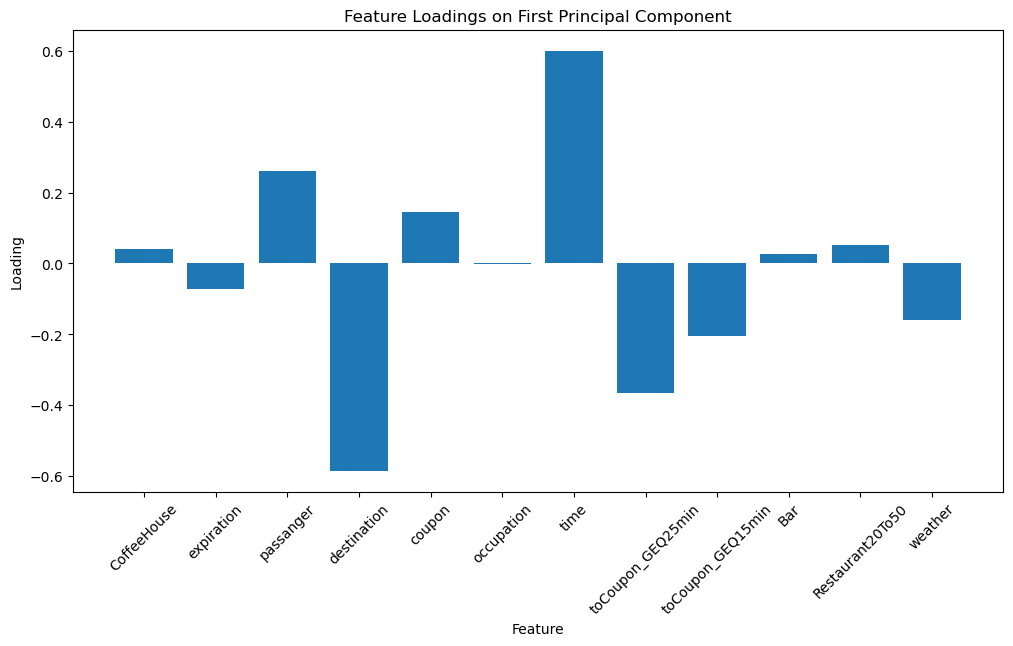

In [107]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'v_coupon'

# Select the features for PCA
new_features = v_coupon[['CoffeeHouse','expiration','passanger','destination','coupon','occupation','time','toCoupon_GEQ25min','toCoupon_GEQ15min','Bar','Restaurant20To50','weather']]

# Encode categorical variables if needed
le = LabelEncoder()
v_coupon['occupation'] = le.fit_transform(v_coupon['occupation'])

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(new_features)

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(imputed_features).corr()

# Perform PCA on the correlation matrix
pca = PCA()
pca.fit(correlation_matrix)

# Extract eigenvalues
eigenvalues = pca.explained_variance_

# Plot scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

# Display eigenvalues for each feature
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Feature {i+1}: {eigenvalue}")
# Extract feature loadings
loadings = pca.components_

# Create a DataFrame to display feature loadings
loadings_df = pd.DataFrame(loadings, columns=new_features.columns)

# Plot feature loadings
plt.figure(figsize=(12, 6))
plt.bar(range(len(loadings_df.columns)), loadings_df.iloc[0], align='center')
plt.xticks(range(len(loadings_df.columns)), loadings_df.columns, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.title('Feature Loadings on First Principal Component')
plt.show()


In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your DataFrame is named 'v_coupon'

# Select the features for PCA
new_features = v_coupon[['CoffeeHouse','expiration','passanger','destination','coupon','time','occupation','toCoupon_GEQ25min','toCoupon_GEQ15min','Bar','Restaurant20To50','weather']]

# Encode categorical variables if needed
le = LabelEncoder()
v_coupon['occupation'] = le.fit_transform(v_coupon['occupation'])

# Impute missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(new_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = new_features.columns
vif_data["VIF"] = [variance_inflation_factor(imputed_features, i) for i in range(imputed_features.shape[1])]

# Display the VIF values
print(vif_data)


             Variable       VIF
0         CoffeeHouse  2.862238
1          expiration  2.232077
2           passanger  1.758192
3         destination  4.848709
4              coupon  3.287715
5                time  4.588249
6          occupation  3.775931
7   toCoupon_GEQ25min  1.446033
8   toCoupon_GEQ15min  2.734085
9                 Bar  2.134578
10   Restaurant20To50  3.362851
11            weather  1.330114


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE


v_coupon.shape



(12684, 24)

In [116]:
from scipy.stats import chi2_contingency

significant_features = {}
for column in v_coupon.columns:
    contingency_table = pd.crosstab(v_coupon[column], y)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    if p_value < 0.05:  # Adjust the significance level as needed
        significant_features[column] = p_value

sorted_features = sorted(significant_features.items(), key=lambda x: x[1])

# Extract the top 10 significant features
top_10_features = dict(sorted_features[:13])

print("Top 10 significant features:")
for feature, p_value in top_10_features.items():
    print(f"{feature}: p-value = {p_value}")



NameError: name 'y' is not defined

In [117]:
column_names = v_coupon.columns.tolist()
print(column_names)
le = LabelEncoder()
v_coupon['occupation'] = le.fit_transform(v_coupon['occupation'])

['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [118]:
from sklearn.model_selection import train_test_split

# Select features and target variable
new_features = v_coupon[['CoffeeHouse','expiration','passanger','destination','occupation','coupon','time','toCoupon_GEQ25min','toCoupon_GEQ15min','Bar','occupation','Restaurant20To50','weather','Y']]
x = new_features.drop(columns=['Y'])  # Features
y = new_features['Y']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)


In [119]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Initialize logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Fit the model with imputed training data
logreg.fit(x_train_imputed, y_train)

# Predict on the testing data
y_pred = logreg.predict(x_test_imputed)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6271186440677966
Confusion Matrix:
 [[ 443  618]
 [ 328 1148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.42      0.48      1061
           1       0.65      0.78      0.71      1476

    accuracy                           0.63      2537
   macro avg       0.61      0.60      0.60      2537
weighted avg       0.62      0.63      0.61      2537



In [120]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split

# Select features and target variable
new_features = v_coupon[['CoffeeHouse','expiration','passanger','destination','occupation','coupon','time','toCoupon_GEQ25min','toCoupon_GEQ15min','Bar','occupation','Restaurant20To50','weather','Y']]
x = new_features.drop(columns=['Y'])  # Features
y = new_features['Y']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)
x_test_imputed = imputer.transform(x_test)

# Initialize PCA with desired number of components
pca = PCA(n_components=13)  # Adjust the number of components as needed

# Initialize logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Create a pipeline with PCA and logistic regression
pipeline = Pipeline([
    ('imputer', imputer),
    ('pca', pca),
    ('logreg', logreg)
])

# Fit the pipeline with training data
pipeline.fit(x_train, y_train)

# Predict on the testing data
y_pred = pipeline.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6271186440677966
Confusion Matrix:
 [[ 444  617]
 [ 329 1147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.42      0.48      1061
           1       0.65      0.78      0.71      1476

    accuracy                           0.63      2537
   macro avg       0.61      0.60      0.60      2537
weighted avg       0.62      0.63      0.61      2537



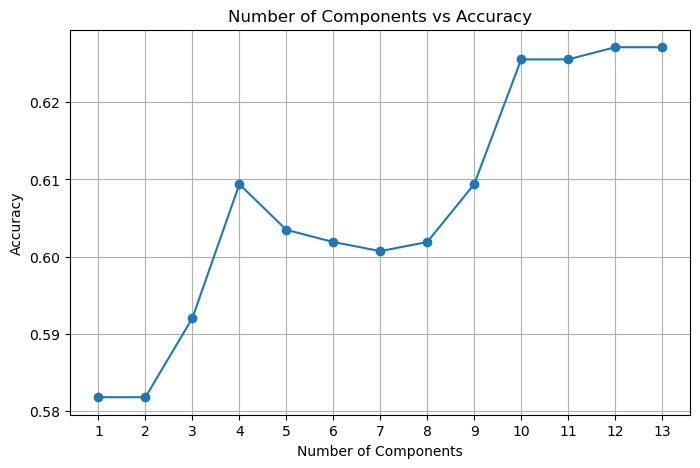

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of number of components
n_components_range = range(1, 14)  # Adjust the range as needed

# Initialize lists to store accuracy for each number of components
accuracy_scores = []

# Iterate over different numbers of components
for n_components in n_components_range:
    # Initialize PCA with the current number of components
    pca = PCA(n_components=n_components)
    
    # Create a pipeline with PCA and logistic regression
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('pca', pca),
        ('logreg', LogisticRegression(solver='liblinear'))
    ])
    
    # Fit the pipeline with training data
    pipeline.fit(x_train, y_train)
    
    # Predict on the testing data
    y_pred = pipeline.predict(x_test)
    
    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot number of components vs accuracy
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, accuracy_scores, marker='o')
plt.title('Number of Components vs Accuracy')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()


In [122]:
# Get the coefficients of the logistic regression model
coefficients = pipeline.named_steps['logreg'].coef_[0]

# Get feature names from the original DataFrame
feature_names = x.columns

# Combine feature names with their coefficients
feature_coefficients = list(zip(feature_names, coefficients))

# Sort feature coefficients based on their absolute values
sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: abs(x[1]), reverse=True)

# Print the top features
print("Top Features:")
for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient}")


Top Features:
toCoupon_GEQ15min: 0.6238559400863803
Bar: -0.38794995535415605
Restaurant20To50: -0.304043284041288
toCoupon_GEQ25min: -0.28747285532423794
passanger: 0.19140853360659882
destination: -0.1434121595636377
occupation: 0.11587678610601002
coupon: 0.08807199788391246
occupation: -0.040398854932904266
expiration: 0.038553481171744765
time: 0.022874033200446762
CoffeeHouse: -0.002009366534469882
weather: -1.1148216914507353e-15


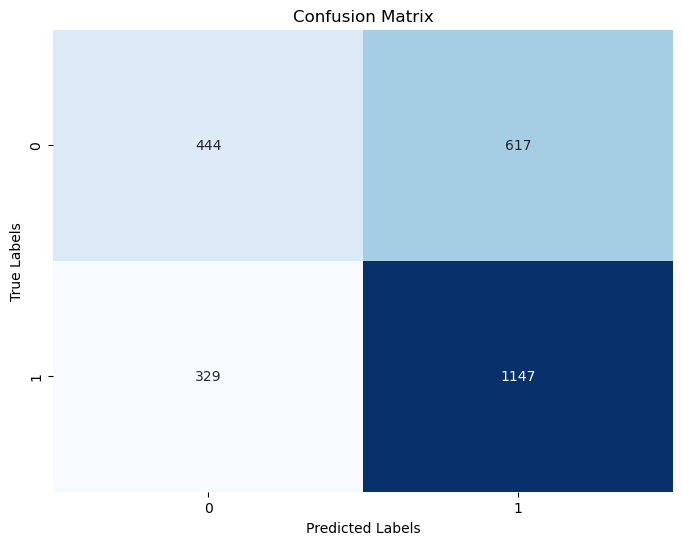

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [124]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_prob are defined earlier
y_pred_prob_positive = y_pred_prob[:, 1]  # Get the probabilities for the positive class

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_positive)


# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'y_pred_prob' is not defined

In [125]:
y_pred_prob=logreg.predict_proba(x_test_imputed)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no acceptance of  coupon (0)','Prob of acceptance of coupon (1)'])
y_pred_prob_df.head()

,Prob of no acceptance of coupon (0),Prob of acceptance of coupon (1)
0,0.162761,0.837239
1,0.367678,0.632322
2,0.757159,0.242841
3,0.366232,0.633768
4,0.194402,0.805598


In [126]:
# Check the distribution of the target variable
class_distribution = y.value_counts()

# Print the class distribution
print("Class distribution:")
print(class_distribution)


Class distribution:
Y
1    7210
0    5474
Name: count, dtype: int64


In [127]:
# Define a dictionary to map user input feature names to their descriptions and options
feature_descriptions = {
    'age': {'<21': 0, '21-30': 1, '31-40': 2, '41-50': 3, '>50': 4, '50plus': 5, 'below21': 6},
    'expiration': {'2h': 0, '1d': 1},
    'income': {
        'Less than $12500': 0,
        
        '$12500 - $24999': 1,
        '$25000 - $37499': 2,
        '$37500 - $49999': 3,
        '$50000 - $62499': 4,
        '$62500 - $74999': 5,
        '$75000 - $87499': 6,
        '$87500 - $99999': 7,
        '$100000 or More': 8
    },
    'time': {'7AM': 0, '10AM': 1, '2PM': 2, '6PM': 3, '10PM': 4},
    'Bar': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'CoffeeHouse': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'Restaurant20To50': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'RestaurantLessThan20': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}
}

# Accept user inputs for each feature
user_inputs = {}
for feature, options in feature_descriptions.items():
    print(f"\nSelect {feature}:")
    for option, value in options.items():
        print(f"{value}. {option}")
    user_input = input("Your choice: ")
    # Validate user input
    while user_input not in options:
        print("Invalid choice. Please select from the provided options.")
        user_input = input("Your choice: ")
    # Convert the user input to the appropriate data type (int)
    user_inputs[feature] = options[user_input]

# Create a DataFrame from the user inputs
user_data = pd.DataFrame(user_inputs, index=[0])

# Ensure the columns are in the same order a21-30s during training
user_data = user_data[x.columns]

# Use the trained model to predict coupon acceptance probability
coupon_acceptance_prob = logreg.predict_proba(user_data)[:, 1]

# Display the predicted coupon acceptance probability to the user
print(f"\nPredicted Coupon Acceptance Probability: {coupon_acceptance_prob[0]:.2f}")



Select age:
0. <21
1. 21-30
2. 31-40
3. 41-50
4. >50
5. 50plus
6. below21
Your choice: 21-30

Select expiration:
0. 2h
1. 1d
Your choice: 2h

Select income:
0. Less than $12500
1. $12500 - $24999
2. $25000 - $37499
3. $37500 - $49999
4. $50000 - $62499
5. $62500 - $74999
6. $75000 - $87499
7. $87500 - $99999
8. $100000 or More
Your choice: $25000 - $37499

Select time:
0. 7AM
1. 10AM
2. 2PM
3. 6PM
4. 10PM
Your choice: 7am
Invalid choice. Please select from the provided options.
Your choice: 7AM

Select Bar:
0. never
1. less1
2. 1~3
3. 4~8
4. gt8
Your choice: never

Select CoffeeHouse:
0. never
1. less1
2. 1~3
3. 4~8
4. gt8
Your choice: never

Select Restaurant20To50:
0. never
1. less1
2. 1~3
3. 4~8
4. gt8
Your choice: never

Select RestaurantLessThan20:
0. never
1. less1
2. 1~3
3. 4~8
4. gt8
Your choice: never


KeyError: "['passanger', 'destination', 'occupation', 'coupon', 'toCoupon_GEQ25min', 'toCoupon_GEQ15min', 'weather'] not in index"

In [ ]:
#Extract the feature names used for model fitting
selected_features = x.columns.tolist()

# Define a dictionary to map user input feature names to their descriptions and options
feature_descriptions = {
    'CoffeeHouse': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'expiration': {'2h': 0, '1d': 1},
    'passanger': {'Alone': 0, 'Friend(s)': 1, 'Kid(s)': 2, 'Partner': 3},
    'destination': {'No Urgent Place': 0, 'Home': 1, 'Work': 2},
    'occupation': {'Unemployed': 0, 'Student': 1, 'Clerk': 2, 'Specialist': 3, 'Professional': 4, 'Housewife': 5, 'Driver': 6, 'Doctor': 7, 'Lawyer': 8, 'Teacher': 9},
    'coupon': {'CoffeeHouse': 0, 'Carry out & Take away': 1, 'Restaurant(20-50)': 2, 'Restaurant(<20)': 3, 'Bar': 4},
    'time': {'7AM': 0, '10AM': 1, '2PM': 2, '6PM': 3, '10PM': 4},
    'toCoupon_GEQ25min': {'No': 0, 'Yes': 1},
    'toCoupon_GEQ15min': {'No': 0, 'Yes': 1},
    'Bar': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'Restaurant20To50': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'weather': {'Sunny': 0, 'Snowy': 1, 'Rainy': 2},
}

# Accept user inputs for each feature
user_inputs = {}
for feature in selected_features:
    options = feature_descriptions[feature]
    print(f"\nSelect {feature}:")
    for option, value in options.items():
        print(f"{value}. {option}")
    user_input = input("Your choice: ")
    # Validate user input
    while user_input not in options:
        print("Invalid choice. Please select from the provided options.")
        user_input = input("Your choice: ")
    # Convert the user input to the appropriate data type (int)
    user_inputs[feature] = options[user_input]

# Create a DataFrame from the user inputs
user_data = pd.DataFrame(user_inputs, index=[0])

# Use the trained model to predict coupon acceptance probability
coupon_acceptance_prob = pipeline.predict_proba(user_data[selected_features])[:, 1]

# Display the predicted coupon acceptance probability to the user
print(f"\nPredicted Coupon Acceptance Probability: {coupon_acceptance_prob[0]:.2f}")
print("Classification Report:\n", class_report)

In [100]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define XGBoost parameters
params = {
    'max_depth': 4,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'verbosity': 0
}

# Train the XGBoost model
num_rounds = 1000
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predict on the testing data
y_pred_xgb = xgb_model.predict(dtest)
y_pred_xgb_binary = [1 if x > 0.5 else 0 for x in y_pred_xgb]

# Calculate evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_binary)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_binary)
class_report_xgb = classification_report(y_test, y_pred_xgb_binary)

# Print the evaluation metrics
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Confusion Matrix:\n", conf_matrix_xgb)
print("XGBoost Classification Report:\n", class_report_xgb)


XGBoost Accuracy: 0.7240835632636973
XGBoost Confusion Matrix:
 [[ 653  408]
 [ 292 1184]]
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65      1061
           1       0.74      0.80      0.77      1476

    accuracy                           0.72      2537
   macro avg       0.72      0.71      0.71      2537
weighted avg       0.72      0.72      0.72      2537



In [104]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.20, random_state=5)

# Define a parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVM classifier
svm_model = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.7168636543518004
Accuracy on Test Set: 0.7264485612928656


Number of tree nodes:  4415
max_depth = 1 Average 10-Fold CV Score: 0.5692 Node count: 3
max_depth = 2 Average 10-Fold CV Score: 0.604 Node count: 7
max_depth = 3 Average 10-Fold CV Score: 0.646 Node count: 15
max_depth = 4 Average 10-Fold CV Score: 0.6691 Node count: 29
max_depth = 5 Average 10-Fold CV Score: 0.685 Node count: 61
max_depth = 6 Average 10-Fold CV Score: 0.6913 Node count: 115
max_depth = 7 Average 10-Fold CV Score: 0.6954 Node count: 217
max_depth = 8 Average 10-Fold CV Score: 0.6891 Node count: 389
max_depth = 9 Average 10-Fold CV Score: 0.6917 Node count: 647


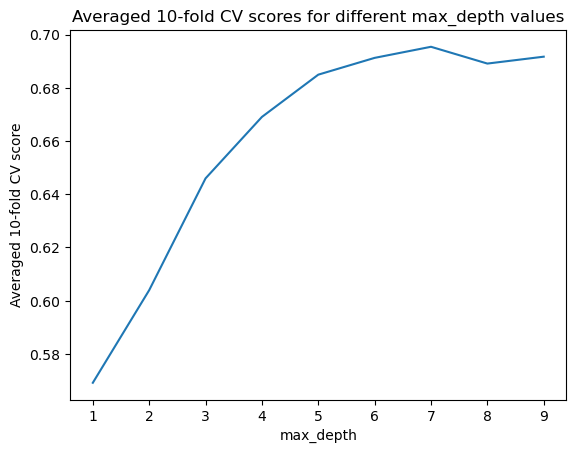

Number of tree nodes: 217
max_depth = 7 max_leaf_nodes = 20 Average 10-Fold CV Score: 0.6847 Node count: 39
max_depth = 7 max_leaf_nodes = 21 Average 10-Fold CV Score: 0.6856 Node count: 41
max_depth = 7 max_leaf_nodes = 22 Average 10-Fold CV Score: 0.6877 Node count: 43
max_depth = 7 max_leaf_nodes = 23 Average 10-Fold CV Score: 0.6879 Node count: 45
max_depth = 7 max_leaf_nodes = 24 Average 10-Fold CV Score: 0.6892 Node count: 47
max_depth = 7 max_leaf_nodes = 25 Average 10-Fold CV Score: 0.6906 Node count: 49
max_depth = 7 max_leaf_nodes = 26 Average 10-Fold CV Score: 0.69 Node count: 51
max_depth = 7 max_leaf_nodes = 27 Average 10-Fold CV Score: 0.6904 Node count: 53
max_depth = 7 max_leaf_nodes = 28 Average 10-Fold CV Score: 0.691 Node count: 55
max_depth = 7 max_leaf_nodes = 29 Average 10-Fold CV Score: 0.6905 Node count: 57
max_depth = 7 max_leaf_nodes = 30 Average 10-Fold CV Score: 0.6906 Node count: 59
max_depth = 7 max_leaf_nodes = 31 Average 10-Fold CV Score: 0.6913 Node cou

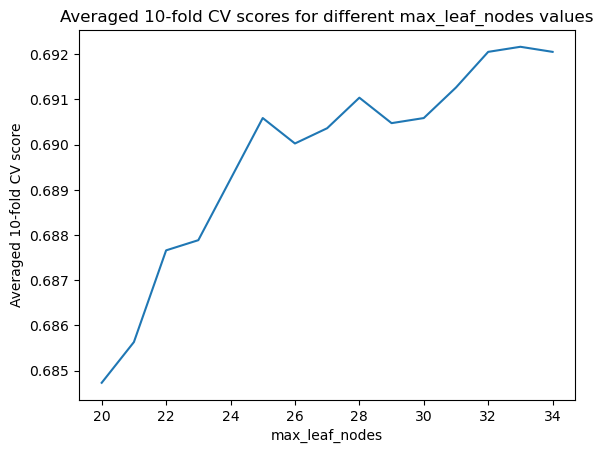

Number of tree nodes after optimizing max leaf nodes: 47


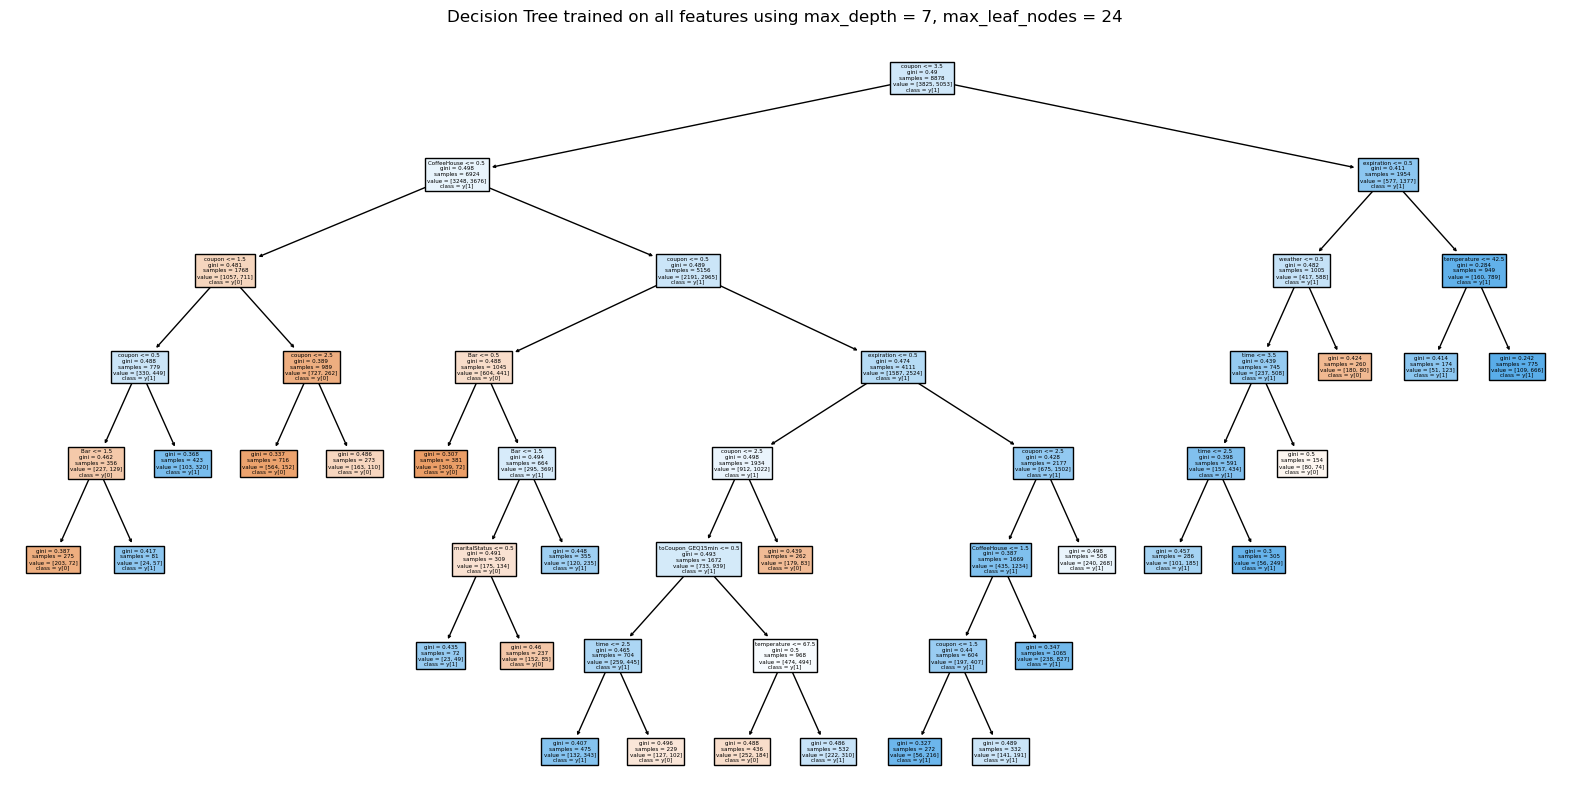

Accuracy score of the model with Decision Tree: 0.70
Precision score of the model with Decision Tree : 0.70
Recall score of the model with Decision Tree : 0.70


In [105]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Encode categorical variables using one-hot encoding
#df_encoded = pd.get_dummies(v_coupon, columns=['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'maritalStatus', 'education', 'occupation', 'income'])

#Define predictors and target
v_coupon['occupation'] = le.fit_transform(v_coupon['occupation'])


# Split data into features and target variable
X = v_coupon.drop(columns=['Y','car'])

y = v_coupon['Y']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build baseline Decision Tree
dt = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifier
tdt = dt.fit(x_train, y_train)
print('Number of tree nodes: ', tdt.tree_.node_count)

# Tune max_depth parameter
maxdepth_cv = []
node_counts = []

for k in range(1, 10):
    dt = DecisionTreeClassifier(max_depth=k, random_state=0)
    dt.fit(x_train, y_train)
    cv = cross_val_score(dt, x_train, y_train, cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth =", k, "Average 10-Fold CV Score:", round(np.mean(cv), 4),
          "Node count:", nodecount)
    maxdepth_cv.append(np.mean(cv))
    node_counts.append(nodecount)

# Plot averaged CV scores for all max_depth tunings
plt.plot(range(1, 10), maxdepth_cv)
plt.xlabel("max_depth")
plt.ylabel("Averaged 10-fold CV score")
plt.title("Averaged 10-fold CV scores for different max_depth values")
plt.show()

# Decision Tree with optimized max_depth = 7
dt = DecisionTreeClassifier(max_depth=7, random_state=0)

# Train DTC
tdt = dt.fit(x_train, y_train)
print('Number of tree nodes:', tdt.tree_.node_count)

# Tune max_leaf_nodes parameter
maxleafnodes_cv = []

for k in range(20, 35):
    dt = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=k, random_state=0)
    dt.fit(x_train, y_train)
    cv = cross_val_score(dt, x_train, y_train, cv=10)
    nodecount = dt.tree_.node_count
    print("max_depth = 7", "max_leaf_nodes =", k, "Average 10-Fold CV Score:", round(np.mean(cv), 4),
          "Node count:", nodecount)
    maxleafnodes_cv.append(np.mean(cv))

# Plot averaged CV scores for all max_leaf_nodes tunings
plt.plot(range(20, 35), maxleafnodes_cv)
plt.xlabel("max_leaf_nodes")
plt.ylabel("Averaged 10-fold CV score")
plt.title("Averaged 10-fold CV scores for different max_leaf_nodes values")
plt.show()

# Decision Tree with optimized max_depth=7, max_leaf_nodes=24
dt_opt = DecisionTreeClassifier(max_depth=7, max_leaf_nodes=24, random_state=0)
dt_opt_fit = dt_opt.fit(x_train, y_train)
print('Number of tree nodes after optimizing max leaf nodes:', dt_opt_fit.tree_.node_count)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_opt_fit, filled=True, class_names=True, feature_names=x_train.columns)
plt.title("Decision Tree trained on all features using max_depth = 7, max_leaf_nodes = 24")
plt.show()

# Evaluate the model
predict_opt = dt_opt.predict(x_test)
acc_score = accuracy_score(y_test, predict_opt)
print("Accuracy score of the model with Decision Tree:", '{:.2f}'.format(acc_score))
precision = precision_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Precision score of the model with Decision Tree :", '{:.2f}'.format(precision))
recall = recall_score(y_true=y_test, y_pred=predict_opt, average='micro')
print("Recall score of the model with Decision Tree :", '{:.2f}'.format(recall))


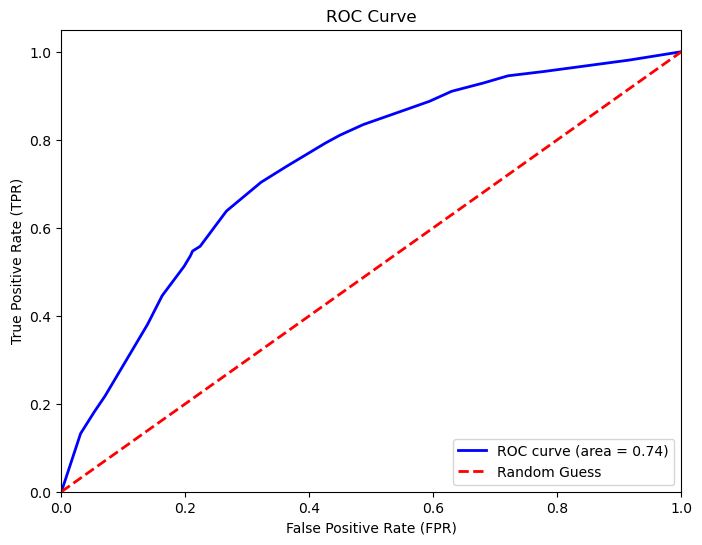

In [107]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = dt_opt.predict_proba(x_test)[:, 1]

# Calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


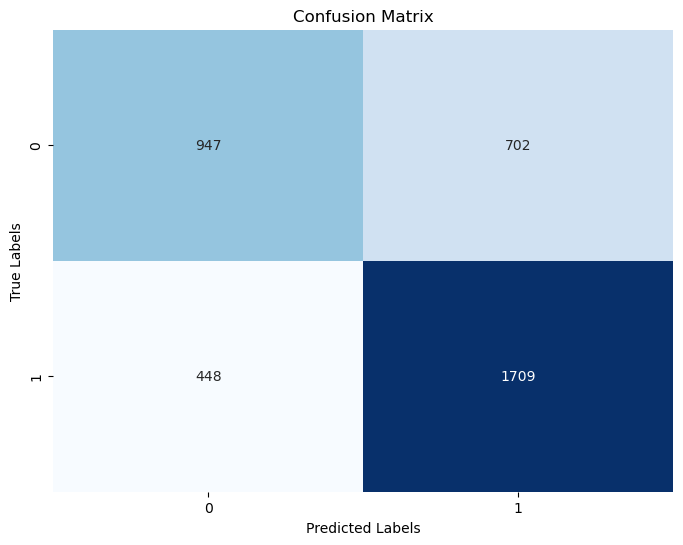

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predicted classes
y_pred = dt_opt.predict(x_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [110]:
from sklearn.metrics import accuracy_score

# Get predicted classes
y_pred = dt_opt.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
from sklearn.metrics import precision_score, recall_score

# Get predicted classes
y_pred = dt_opt.predict(x_test)

# Calculate precision score
precision = precision_score(y_test, y_pred)

# Calculate recall score
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.697845507094062
Precision: 0.708834508502696
Recall: 0.7923041261010663


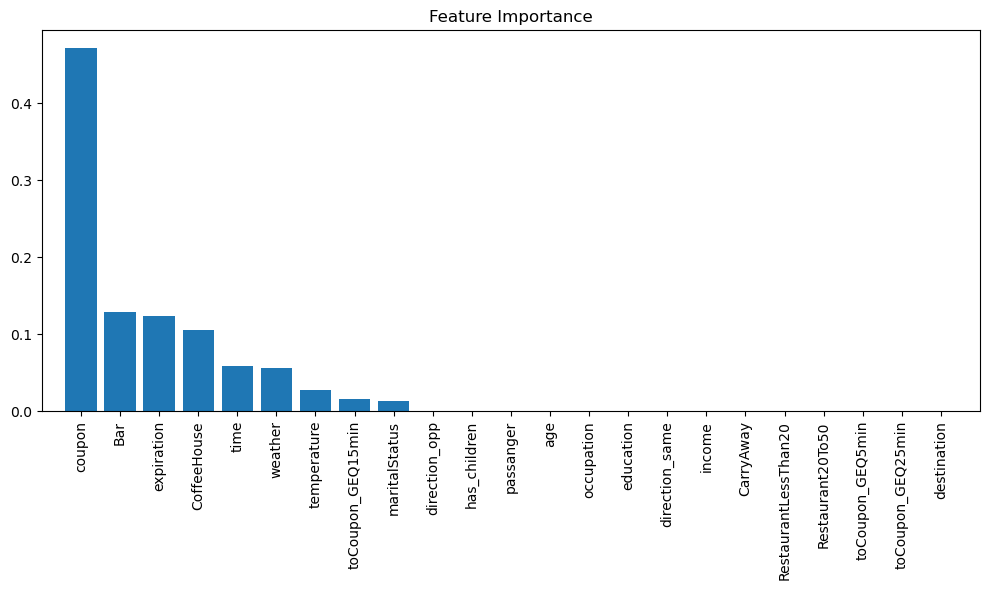

In [106]:
## Plot feature importance
importances = dt_opt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()


In [ ]:
def predict_coupon_acceptance():
    # Define input fields and their data types
    input_fields = {
        'passanger': str,
        'weather': str,
        'time': str,
        'coupon': str,
        'expiration': str,
        'maritalStatus': str,
        'Bar': str,
        'CoffeeHouse': str
    }

    # Get user input
    user_input = {}
    for field, data_type in input_fields.items():
        user_input[field] = data_type(input(f"Enter {field}: "))

  
    sample_df = pd.DataFrame([user_input])

   
    sample_df_encoded = pd.get_dummies(sample_df, columns=list(input_fields.keys()))

    missing_columns = set(x_train.columns) - set(sample_df_encoded.columns)
    for col in missing_columns:
        sample_df_encoded[col] = 0  

    
    sample_df_encoded = sample_df_encoded[x_train.columns]

   
    prediction = dt_opt.predict(sample_df_encoded)

    # Print the prediction
    if prediction[0] == 1:
        print("The coupon can be accepted.")
    else:
        print("The coupon cannot be accepted.")


predict_coupon_acceptance()


In [ ]:
X = v_coupon.drop(columns=['coupon','car'])  # Features
y = v_coupon['coupon']  # Target variable

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build Decision Tree Classifier
dt_coupon = DecisionTreeClassifier(random_state=0)

# Train Decision Tree Classifier
dt_coupon.fit(x_train, y_train)

# Evaluate the model
accuracy = dt_coupon.score(x_test, y_test)
print("Accuracy:", accuracy)



In [ ]:
def predict_coupon_type(passenger_info):
    # Encode categorical variables using one-hot encoding
    passenger_df = pd.DataFrame([passenger_info])
    passenger_df_encoded = pd.get_dummies(passenger_df, columns=passenger_info.keys())

    # Ensure that the input data has the same columns as the features used to train the decision tree model
    missing_columns = set(x_train.columns) - set(passenger_df_encoded.columns)
    for col in missing_columns:
        passenger_df_encoded[col] = 0  # Assuming default value is 0 for missing categorical variables

    # Reorder columns to match the order used in training the decision tree model
    passenger_df_encoded = passenger_df_encoded[x_train.columns]

    # Use the trained decision tree model to predict coupon type
    predicted_coupon_type = dt_coupon.predict(passenger_df_encoded)

    # Map numeric label to its corresponding textual representation
    coupon_type_mapping = {
        0: 'Bar',
        1: 'Coffee House',
        2: 'Restaurant(20-50)',
        3: 'Restaurant(<20)',
    }

    return coupon_type_mapping[predicted_coupon_type[0]]

# Example passenger information
passenger_info = {
    'destination': 'No Urgent Place',
    'passanger': 'Alone',
    'weather': 'Sunny',
    'time': '2PM',
    'expiration': '1d',
    'age': 21,
    'maritalStatus': 'Unmarried partner',
    'has_children': 1,
    'education': 'Some college - no degree',
    'occupation': 'Unemployed',
    'income': '$37500 - $49999',
    'Bar': 'never',
    'CoffeeHouse': '4~8',
    'RestaurantLessThan20': 1,
    'Restaurant20To50': 1,
    'toCoupon_GEQ5min': 1,
    'toCoupon_GEQ15min': 1,
    'toCoupon_GEQ25min': 0,
    'direction_same': 1,
    'direction_opp': 0
}

# Get predicted coupon type for the passenger
predicted_coupon_type = predict_coupon_type(passenger_info)
print("Predicted coupon type:", predicted_coupon_type)


In [ ]:
print(v_coupon.dtypes)
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'occupation' column
v_coupon['occupation'] = le.fit_transform(v_coupon['occupation'])

# Check the data types after encoding
print(v_coupon.dtypes)



In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x.head(5)

In [ ]:
v_coupon[['passanger','destination', 'maritalStatus','has_children', 'occupation', 'coupon', 'temperature','weather']].nunique()